# Diamond Price Modelling Based on Their Attributes

Author: **Marcin Sikorski**<br>
Date: June, 2022

**Introduction**<br>
In this notebook, we will explore the factors that affect the price of a diamond with a goal of finding a model to help estimate the price of these minerals. For many millenniums, diamonds have been very desirable for jewellery and trade. They have been associated with wealth, perfection, durability, and purity, due to the fact of their rarity and physical properties.

The purpose is to develop an automated function to predict the price of a diamond based on its given features (cut, color, dimensions, etc.). We will create a machine learning model which can estimate these values. We need to find continuous data, so we will perform a regression task. We will use supervised learning to find the prices.

**Notebook Content:**
1. Reading the Dataset
2. Data Cleansing<br>
    2a. Handling Missing Values<br>
    2b. Handling Outiers and Errors<br>
3. Exploratory Data Analysis
4. Relationship Exploration for Continuous Data
5. Relationship Exploration for Categorical Data
6. Converting Categorical Data into Numeric Values
7. Normalizing and Splitting Data
8. Choosing Estimators and Initial Evaluation
9. Polynomial Regresser
10. k-Nearest Neighbors Regressor
11. Random Forest Ensemble
12. AdaBoost Ensemble
13. Model Persistence
14. Summary

### 1. Reading the Dataset

We will load data from CSV file into a <code>pandas</code> dataframe and check the first rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing data and creating dataframe
def load_dataset():
    file = 'diamonds.csv'
    df = pd.read_csv(file, header=0, encoding='utf-8')
    return df

df = load_dataset()
df.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


**Data Description**

Content and meaning of each column in the data is as below:
* **price** - diamond price in US dollars and target variable (continuous);
* **carat** - weight of the diamond (continuous);
* **cut** - quality of cut (categorical);
* **color** - diamond color (categorical);
* **clarity** - measure of flawless or how clear the diamond is (categorical);
* **depth** - total depth percentage estimated by formulas $z/mean(x, y)$ or $2z/(x + y)$ (continuous);
* **table** - width of top of the diamond relative to widest point (continuous);
* **x** - lenghth in mm (continuous);
* **y** - width in mm (continuous);
* **z** - depth in mm (continuous).

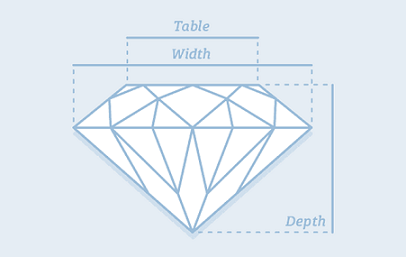

### 2. Data Cleansing

We successfully loaded the sample into the repository. It is time to investigate the data to summarize the dataset, get a good understanding, and see what the data can tell us before the modelling task. We will search for: possible mistakes, feature distribution, patterns, completness and size. At this stage we will clean the data to understand it more.

In [2]:
# displaying duplicate rows (if any)
df.loc[df.duplicated(keep='first')]

,price,carat,cut,color,clarity,depth,table,x,y,z
1005,2898,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66
1006,2898,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66
1007,2898,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66
1008,2898,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66
2025,3105,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,1919,0.52,Ideal,D,VS2,61.8,55.0,5.19,5.16,3.20
49326,2093,0.51,Ideal,F,VVS2,61.2,56.0,5.17,5.19,3.17
49557,2130,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00
50079,2203,0.51,Ideal,F,VVS2,61.2,56.0,5.19,5.17,3.17


In [3]:
# removing duplicate rows
df = df.drop_duplicates()

# descriptive statistics of dataset (including categorical data)
df.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


**Summary Interpretation**
* There are missing values in <code>color</code> and <code>depth</code> columns. Rest of them are complete.
* Min value row displays 0.0 for <code>x</code>, <code>y</code> and <code>z</code> columns. These are most likely measurement errors in the data. If they are not numerous, we can drop the rows. It is still better to replace them with estimated values.

#### 2a. Handling Missing Values

Lets display rows with NaN values for <code>color</code> and <code>depth</code> variables.

In [4]:
# displaying rows with NaN in 'depth'
df[df['depth'].isnull()]

,price,carat,cut,color,clarity,depth,table,x,y,z
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
12,342,0.22,Premium,F,SI1,NaN,61.0,3.88,3.84,2.33
78,554,0.26,Very Good,D,VVS2,NaN,60.0,4.01,4.05,2.53
80,554,0.26,Very Good,E,VVS1,NaN,59.0,4.00,4.04,2.55
93,2759,0.71,Very Good,E,VS2,NaN,57.0,5.68,5.73,3.56
96,2759,0.70,Good,F,VS1,NaN,62.0,5.71,5.76,3.40
111,2761,0.74,Ideal,E,SI2,NaN,56.0,5.80,5.84,3.62
115,2762,0.73,Ideal,F,VS2,NaN,53.0,5.80,5.75,3.62
122,2762,0.70,Very Good,F,VS2,NaN,63.0,5.64,5.61,3.47
149,2768,0.70,Ideal,E,SI1,NaN,57.0,5.73,5.76,3.50


In [5]:
# displaying rows with NaN in 'color'
df[df['color'].isnull()]

,price,carat,cut,color,clarity,depth,table,x,y,z
25,354,0.23,Very Good,NaN,VVS2,60.4,58.0,3.97,4.01,2.41
51,404,0.23,Ideal,NaN,VS1,61.9,54.0,3.93,3.95,2.44
106,2760,0.80,Premium,NaN,SI1,63.0,59.0,5.90,5.81,3.69
117,2762,0.71,Ideal,NaN,VS2,62.4,54.0,5.72,5.76,3.58
146,2768,0.71,Very Good,NaN,VS1,63.3,59.0,5.52,5.61,3.52
227,2782,0.84,Fair,NaN,SI1,55.1,67.0,6.39,6.20,3.47


Steps we can make to eliminate missing values:
1. We can easily calculate <code>depth</code> values using the equation introduced in previous data description.
2. Missing colors will be replaced by mode value.

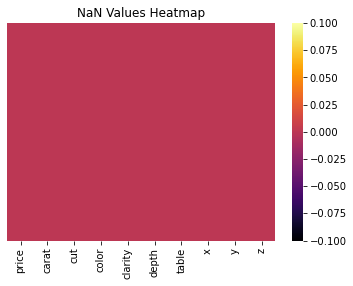

In [6]:
# replacing missing values
def replace_nan_values():
    # 'depth' column (percentage)
    equation = df['z'] / df[['x', 'y']].mean(axis=1) * 100
    df['depth'].fillna(value=equation.round(decimals=1), inplace=True)
    
    # 'color' column
    df['color'].fillna(value=df['color'].mode()[0], inplace=True)
    
replace_nan_values()

# representing null values with a heatmap
def plot_nan_values():
    from seaborn import heatmap

    # plot heatmap
    plt.figure(figsize=(6, 4))
    heatmap(data=df.isnull(), cbar=True, yticklabels=False, cmap='inferno')
    plt.title('NaN Values Heatmap')
    plt.show()

plot_nan_values()

As the heatmap displays, we successfully replaced all blank cells and the dataframe has no more NaN values.

#### 2b. Handling Outiers and Errors

Outliers are extreme values in a dataset which are far away from most of the values. These values are visible as tails in histograms or as isolated data points on scatter plots.<br>
Anomalies bias the training data of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data. Most regression models are sensitive to outliers. That is way treating noisy data is highly recommended. Detecting outliers can be done by visual evaluation, applying statistical tests, or other machine learning modelling.

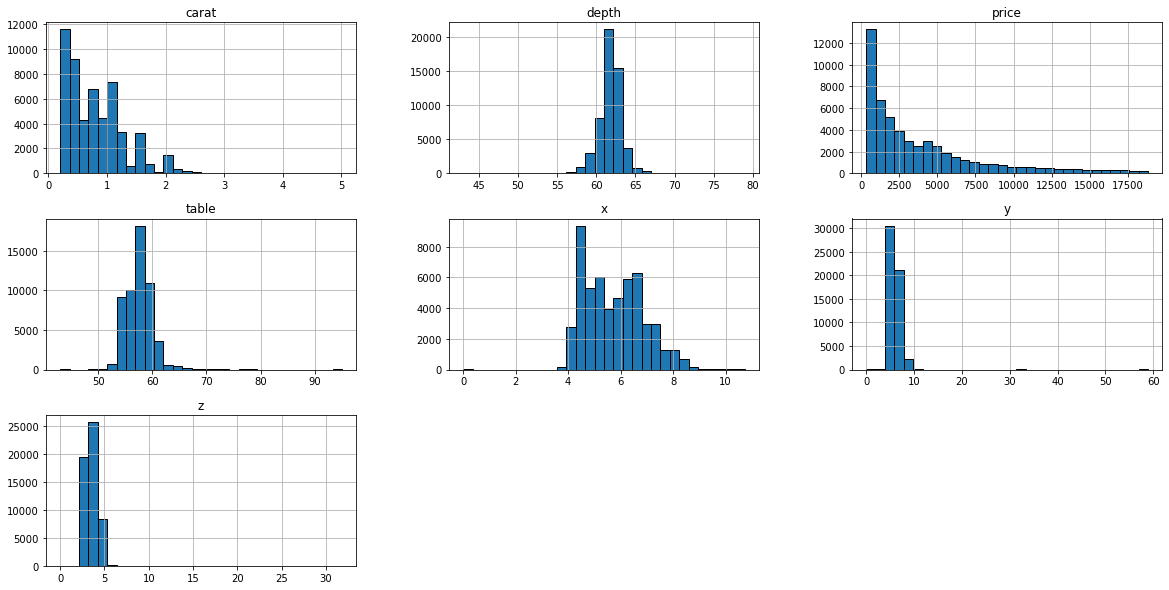

In [7]:
# variable distribution
df.hist(figsize=(20, 10), bins=30, edgecolor='black')
plt.show()

**Histogram Interpretation**
* We can see zero values are visible on these histograms. There are also extreme bars far from mean values, which need to be either removed or adjusted.
* None of these variables are normally distributed. Each of them dispaly some skewness. The bell curve is desirable but slightly positive or negative skew is also acceptable.
* Target column has a Poisson distribution and predictive modelling in this case is possible. This kind of distribution is satisfactory to proceed further. Too much skewness in distribution is a big obstacle and impacts the machine learning algorithms ability to learn.

Lets start from searching and correcting zero values.

In [8]:
# displaying any instances with 0.0 value in x, y, z
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,price,carat,cut,color,clarity,depth,table,x,y,z
2207,3142,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0
2314,3167,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0
4791,3696,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0
5471,3837,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0
10167,4731,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0
11182,4954,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0
11963,5139,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0
13601,5564,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0
15951,6381,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0
24394,12631,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0


Steps we can take to eliminate zero values:
1. If we look closely at <code>x</code> and <code>y</code> columns, we can notice these values are similar but <code>x</code> is approximately 0.1 greater. Diamonds are usually round, so in essence the <code>x</code> and <code>y</code> are simply different measurements of the diameters of the gems. Cell <code>x</code> in row with index 11182 will be replaced by 6.72.
2. Rows with zero only in <code>z</code> cells can be easily calculated by derived formula: $z = depth \times mean(x, y)$.

In [9]:
# replacing zero values
def replace_zero_values():
    # update row
    df.at[11182, 'x'] = 6.72
    
    # 'z' column - conditional replacing
    equation = (df['depth'] * df[['x', 'y']].mean(axis=1)) / 100
    df.loc[df['z'] == 0.0, 'z'] = equation.round(decimals=1)
    return

replace_zero_values()

In [10]:
# displaying again instances with 0.0
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,price,carat,cut,color,clarity,depth,table,x,y,z
11963,5139,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.0,0.0
15951,6381,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0
24520,12800,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.0,0.0
26243,15686,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.0,0.0
27429,18034,2.25,Premium,H,SI2,62.8,59.0,0.0,0.0,0.0
49556,2130,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0


We can remove (drop) these rows because they are not numerous. Still, we wil implement these steps:
1. Check <code>y</code> column distribution on previous histogram and choose between median, mean or mode. This variable has positive skewness. We will replace 0.0 values with a median.
2. For <code>x</code> we will add 0.1 to that value.
3. Finally, we will calculate <code>z</code> with previous equation: $z = depth \times mean(x, y)$.

In [11]:
# replacing zero values again
def replace_zero_values():
    # 'y' column - conditional replacing
    df.loc[df['y'] == 0.0, 'y'] = df['y'].median()
    
    # 'x' column - adding 0.1
    df.loc[df['x'] == 0.0, 'x'] = df['y'].median() + 0.1
    
    # 'z' column - conditional replacing
    equation = (df['depth'] * df[['x', 'y']].mean(axis=1)) / 100
    df.loc[df['z'] == 0.0, 'z'] = equation.round(decimals=1)

replace_zero_values()

# displaying summary
def summarize():
    print('Dataframe has zero values:', 0.0 in df.values)
    print('Rows and columns:', df.shape)

summarize()

Dataframe has zero values: False
Rows and columns: (53794, 10)


At this stage we adjusted cells with zero values. This was the best approach since dropping rows can unnecessary cause losing lot of valuable information.<br>
To detect anomalies in this set of data we will generate the summary again and overview the content. Of course, we will apply corrections on numerical columns.

In [12]:
# summary of dataset
df.describe()

,price,carat,depth,table,x,y,z
count,53794.000000,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,3933.065082,0.79778,61.748076,57.458109,5.731987,5.735290,3.540197
std,3988.114460,0.47339,1.429915,2.233679,1.118794,1.139601,0.702113
min,326.000000,0.20000,43.000000,43.000000,3.730000,3.680000,1.070000
25%,951.000000,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000


In [13]:
# displaying row with heaviest diamond
df[df['carat'] == df['carat'].max()]

,price,carat,cut,color,clarity,depth,table,x,y,z
27415,18018,5.01,Fair,J,I1,65.5,59.0,10.74,10.54,6.98


**Summary Interpretation**
* As we noticed earlier, <code>x</code> and <code>y</code> have similar dimensions (and should be because dimaonds usually have round cross sections). These two columns in the summary indeed have almost the same values expect max values. The max value for <code>y</code> is an error and this cell should have approximately 11.
* The heaviest gem in the dataframe presents dimensions far smaller than max values for <code>y</code> and <code>z</code>. A gem with diameter 58.9 would be enormous and weighing 28 carats.
* Similarly with the same pattern we can conclude the max value for <code>z</code> is also a mistake and should not be higher than approximately 7.

Lets display these extreme rows.

In [14]:
# displaying errors
df.loc[(df['y'] > 11) | (df['z'] > 7)]

,price,carat,cut,color,clarity,depth,table,x,y,z
24067,12210,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06
48410,1970,0.51,Very Good,E,VS1,61.8,54.7,5.12,5.15,31.80
49189,2075,0.51,Ideal,E,VS1,61.8,55.0,5.15,31.80,5.12


Since there are only three entries, we will correct this values manually:
1. For first and third row, we will adjust <code>y</code> by subtracting 0.1 from <code>x</code>.
2. Correct <code>z</code> values using formula from dataset description.

In [15]:
# correcting wrong values
def correct_errors():
    # 'y' column
    for index in [24067, 49189]:
        df.at[index, 'y'] = df.at[index, 'x'] - 0.1
        
    # 'z' column
    equation = (df.at[index, 'depth'] * (df.at[index, 'x'] + df.at[index, 'y'])/2) / 100
    for index in [24067, 48410, 49189]:
        df.at[index, 'z'] = equation.round(decimals=1)

correct_errors()

# checking corrections in rows
for index in [24067, 48410, 49189]:
    print(df.loc[[index]])

       price  carat      cut color clarity  depth  table     x     y    z
24067  12210    2.0  Premium     H     SI2   58.9   57.0  8.09  7.99  3.2
       price  carat        cut color clarity  depth  table     x     y    z
48410   1970   0.51  Very Good     E     VS1   61.8   54.7  5.12  5.15  3.2
       price  carat    cut color clarity  depth  table     x     y    z
49189   2075   0.51  Ideal     E     VS1   61.8   55.0  5.15  5.05  3.2


The three rows have been updated properly. Lets generate scatter plots for overall visual evaluation.

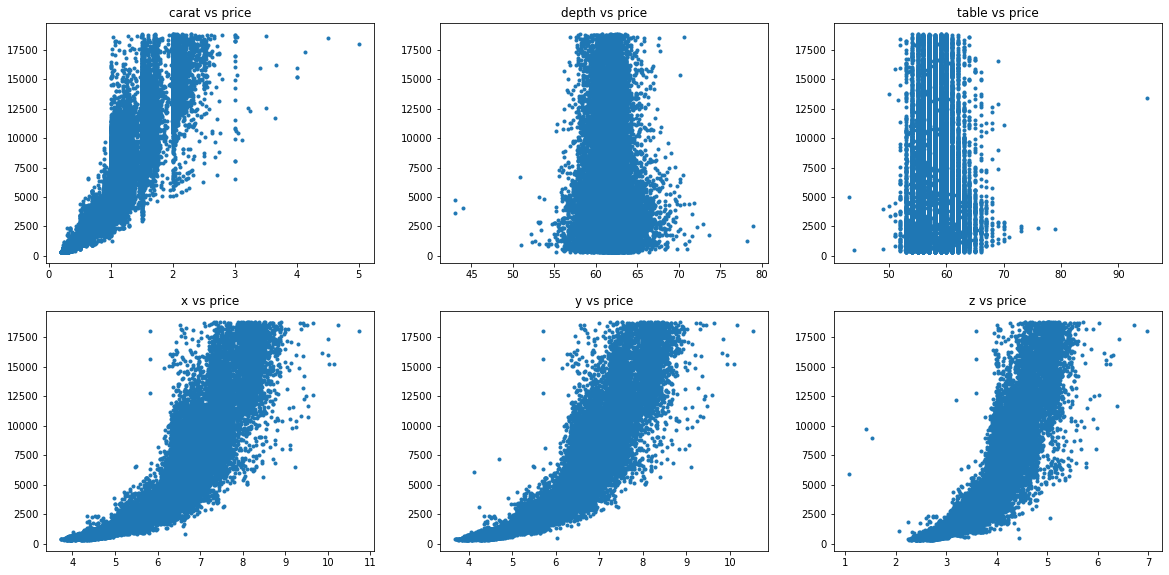

In [16]:
# plot scatter plots for each continuous column
def plot_scatter_plots():
    # plot size
    plt.subplots(figsize=(20, 15))
    
    columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
    
    count = 1
    # plotting scatter charts for each predictor vs the target variable
    for predictor in columns:
        plt.subplot(3, 3, count)
        plt.scatter(x=df[predictor], y=df['price'], marker='.')
        plt.title(predictor + ' vs ' + 'price')
        count += 1
    plt.show()

plot_scatter_plots()

Again, we can observe the similarity between <code>x</code> and <code>y</code> dimensions based on point distribution. We still need to investigate columns: <code>depth</code>, <code>table</code>, and <code>z</code>. It is easy to spot noisy data points on these charts. We will filter out rows with outliers for each of them.

In [17]:
# extreme 'depth' values
df.loc[(df['depth'] > 75) | (df['depth'] < 50)]

,price,carat,cut,color,clarity,depth,table,x,y,z
4518,3634,1.00,Fair,G,SI1,43.0,59.0,6.32,6.27,3.97
6341,4032,1.00,Fair,G,VS2,44.0,53.0,6.31,6.24,4.12
10377,4778,1.09,Ideal,J,VS2,43.0,54.0,6.53,6.55,4.12
41918,1262,1.03,Fair,E,I1,78.2,54.0,5.72,5.59,4.42
52860,2579,0.50,Fair,E,VS2,79.0,73.0,5.21,5.18,4.09


In [18]:
# extreme 'table' values
df.loc[(df['table'] > 75) | (df['table'] < 45)]

,price,carat,cut,color,clarity,depth,table,x,y,z
11368,4997,1.04,Ideal,I,VS1,62.9,43.0,6.45,6.41,4.04
24932,13387,2.01,Fair,F,SI1,58.6,95.0,8.32,8.31,4.87
35633,474,0.29,Very Good,E,VS1,62.8,44.0,4.20,4.24,2.65
50773,2301,0.81,Fair,F,SI2,68.8,79.0,5.26,5.20,3.58
51342,2362,0.79,Fair,G,SI1,65.3,76.0,5.52,5.13,3.35


In [19]:
# extreme 'z' values
df.loc[(df['z'] < 2)]

,price,carat,cut,color,clarity,depth,table,x,y,z
14635,5909,1.07,Ideal,F,SI1,60.6,57.0,6.62,6.67,1.07
20694,8971,1.53,Ideal,I,SI1,61.9,54.0,7.43,7.50,1.53
21654,9752,1.41,Ideal,H,VS1,60.7,56.0,7.31,7.22,1.41


Fortunately, the number of instances is not numerous and it is worth correcting them manually:
1. Rows with extreme <code>depth</code> can be recalculated with equation: $depth = z/mean(x, y)$.
2. Replace <code>table</code> cells with a mean value for depth between 58 and 69.
3. For <code>z</code> outliers, we will simply find the new values with formula: $z = depth \times mean(x, y)$.

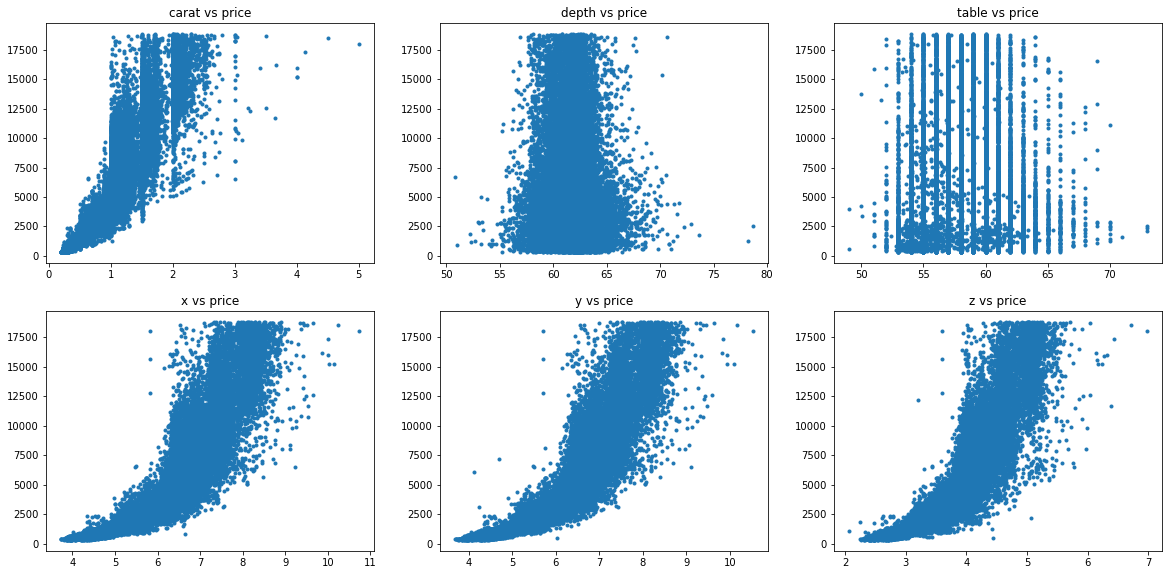

In [20]:
# further correcting outliers
def correct_errors():
    # 'depth' values - conditional replacing
    formula_1 = df['z'] / df[['x', 'y']].mean(axis=1) * 100
    cond_1 = ((df['depth'] > 75) | (df['depth'] < 50))
    df.loc[cond_1, 'depth'] = formula_1.round(decimals=1)

    # 'table' values - conditional mean
    cond_mean = ((df['depth'] > 58) | (df['depth'] < 69))
    mean = round(df.loc[cond_mean, 'depth'].mean(), ndigits=2)  
    cond_2 = ((df['table'] > 75) | (df['table'] < 45))
    df.loc[cond_2, 'table'] = mean
               
    # 'z' values
    formula_2 = (df['depth'] * df[['x', 'y']].mean(axis=1)) / 100    
    df.loc[df['z'] < 2, 'z'] = formula_2.round(decimals=2)

correct_errors()

# checking for anomalies
plot_scatter_plots()

**Data Cleansing Summary**

On new scatter plots we can see how point distribution improved by adjusting wrong values. The range for the predictors narrowed. We successfully removed anomalies from this dataset. Outlier detection and correction requires substantial understanding of data. There are still a few visible points with depth greater then 75 after correcting these values. These points were most likely not outliers at all and this is a clear example that dropping rows is not always the optimal operation. Removing rows can cause loosing other valuable information.

We finialized data cleansing and investigating the dataframe by: dropping duplicates, filling NaN values, and handling noisy data. We also have initial knowledge of variable distribution. It is time to proceed and do more data mining.

### 3. Exploratory Data Analysis

We will perform further investigation on this dataset to discover more patterns, check assumptions and summary statistics with graphical representations. EDA allows planning the gathering of data to make data modelling more precise or more accurate. This stage can provide much more insights of the data.

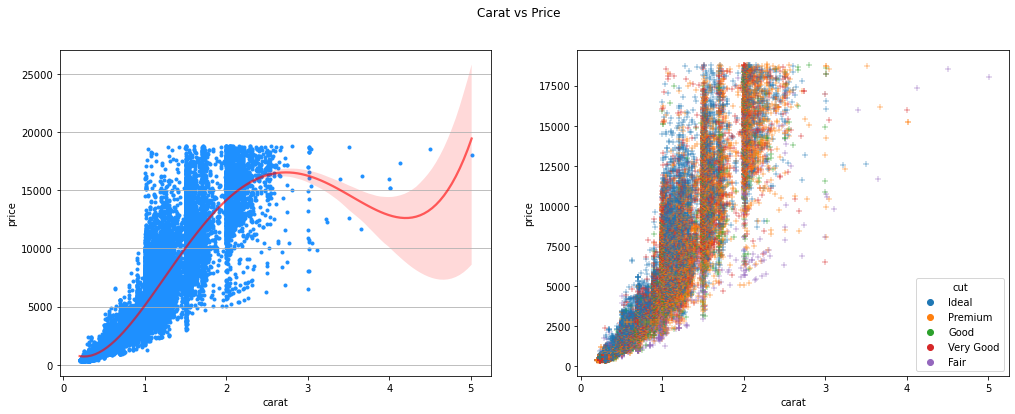

In [21]:
# plot scatter plots - fitted spline and cut
def scatter_plots():
    from seaborn import regplot, scatterplot
    
    fig = plt.figure(figsize=(17, 6))
    fig.suptitle('Carat vs Price')
    
    # subplot_1
    plt.subplot(1, 2, 1)
    regplot(data=df, x='carat', y='price', marker='.', scatter=True, scatter_kws={'color': 'dodgerblue', 'alpha': 1},
            line_kws={'color': 'red', 'alpha': 0.6}, order=4, truncate=True)
    plt.grid(axis='y')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    scatterplot(data=df, x='carat', y='price', marker='+', hue='cut')
    plt.show()

scatter_plots()

**Sample Conclusions**
* It is obvious that larger and heavier diamonds are much more expensive. Carat is probably the most important feature in this dataset that impacts diamond value. We fitted a spline into the data points to get an overall insight of the trend.
* Ideal and premium cuts seem to be the most numerous among all diamonds.
* The heaviest diamonds have mostly lower cutting grades and ideal cut is mostly assigned for smaller carats.

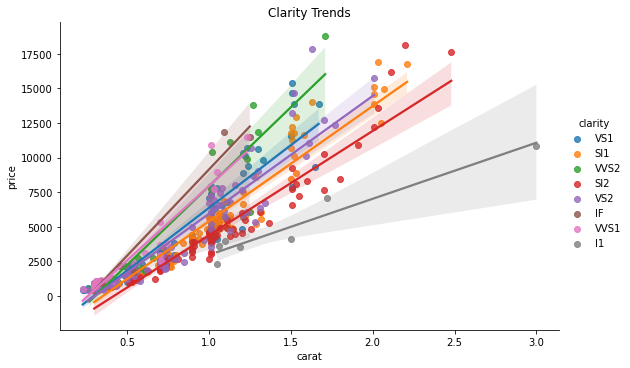

In [22]:
# linear model plot to fit regression models across clarities
def line_plot_clarity():
    from seaborn import lmplot
    
    # plot fraction of dataframe for greater readability
    lmplot(data=df.sample(frac=0.01, replace=False, random_state=24), x='carat', y='price',
           hue='clarity', order=1, height=5, aspect=1.6)
    plt.title('Clarity Trends')
    plt.show()

line_plot_clarity()

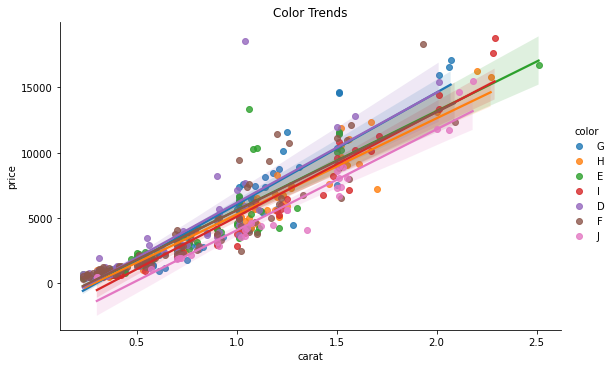

In [23]:
# linear model plot to fit regression models across colors
def line_plot_color():
    from seaborn import lmplot
    
    lmplot(data=df.sample(frac=0.01, replace=False, random_state=14), x='carat', y='price',
           hue='color', order=1, height=5, aspect=1.6)
    plt.title('Color Trends')
    plt.show()

line_plot_color()

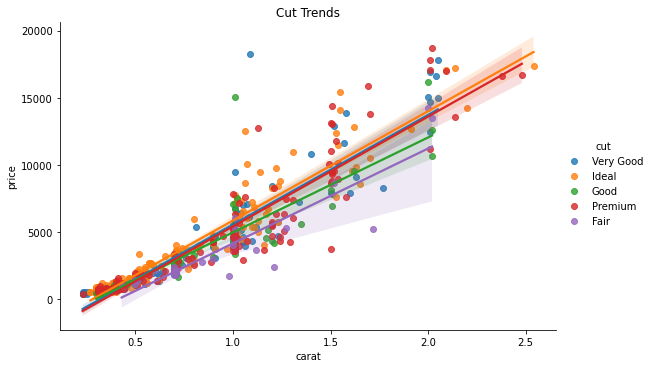

In [24]:
# linear model plot to fit regression models across cuts
def line_plot_cut():
    from seaborn import lmplot
    
    lmplot(data=df.sample(frac=0.01, replace=False, random_state=53), x='carat', y='price',
           hue='cut', order=1, height=5, aspect=1.6)
    plt.title('Cut Trends')
    plt.show()

line_plot_cut()

**Line Plots Summary**
* Clarity has the greatest affect on diamond prices among all categorical features. The line slopes for color and cut are not very varied and almost overlay each other. They do not impact diamond value as that much.
* In the clarity chart, we can easily notice how each label affects the price. The most desirable clarity (flawless IF) has the largest incline for fitted line and gradually decreases with every less desirable class (imperfect I1 has the least slope).
* This pattern is also visible in the cut plot. Fair cut has the smallest angle and ideal cut has the highset fitted line.

We will plot frequency of labels using bar charts and visualize proportions with pie plots.

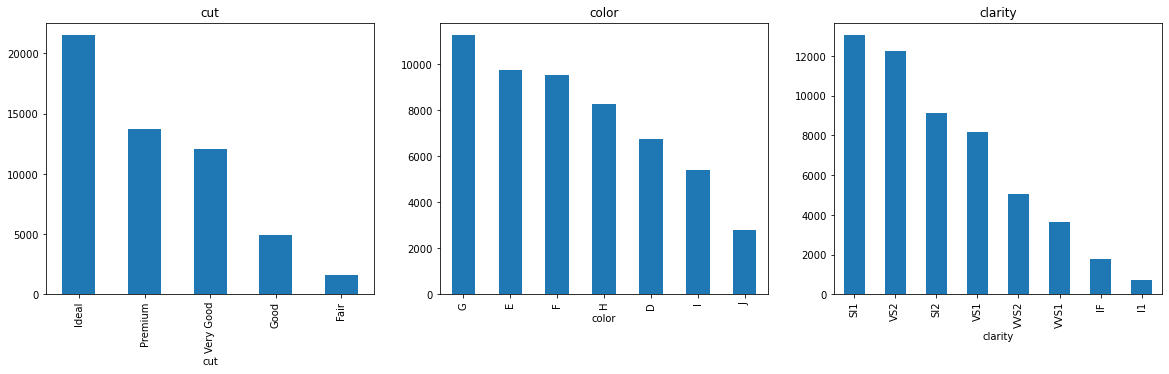

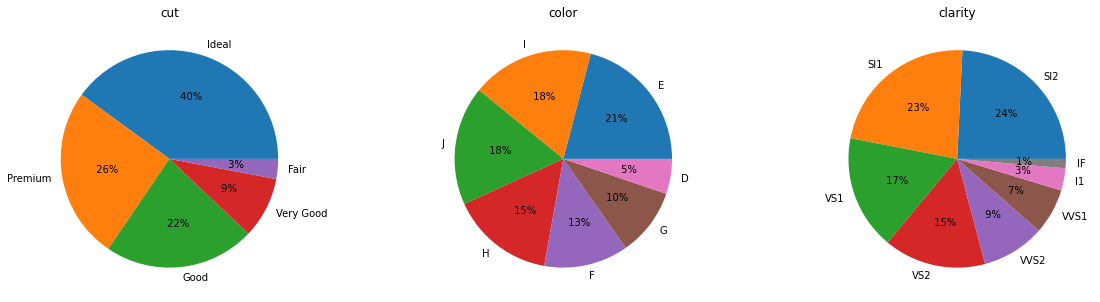

In [25]:
# plotting quantity and proportions for each categorical column
def plot_quantity():

    # plotting bar charts for each predictor
    plt.subplots(figsize=(20, 5))
    columns = ['cut', 'color', 'clarity']
    
    count = 1
    for feature in columns:
        plt.subplot(1, 3, count)
    
        # count labels in each categorical column and sort descending  
        df.groupby(feature).size().sort_values(ascending=False).plot.bar(title=feature)    
        count += 1
    plt.show()
    
    # plotting pie charts for each predictor
    plt.subplots(figsize=(20, 5))
    
    count = 1
    for feature in columns:
        plt.subplot(1, 3, count)
        
        values = df[feature].value_counts()
        labels = df[feature].unique().tolist()
        plt.pie(values, labels=labels, autopct=lambda p: f'{p: .0f}%')
        plt.title(feature)
        count += 1
    plt.show()

plot_quantity()

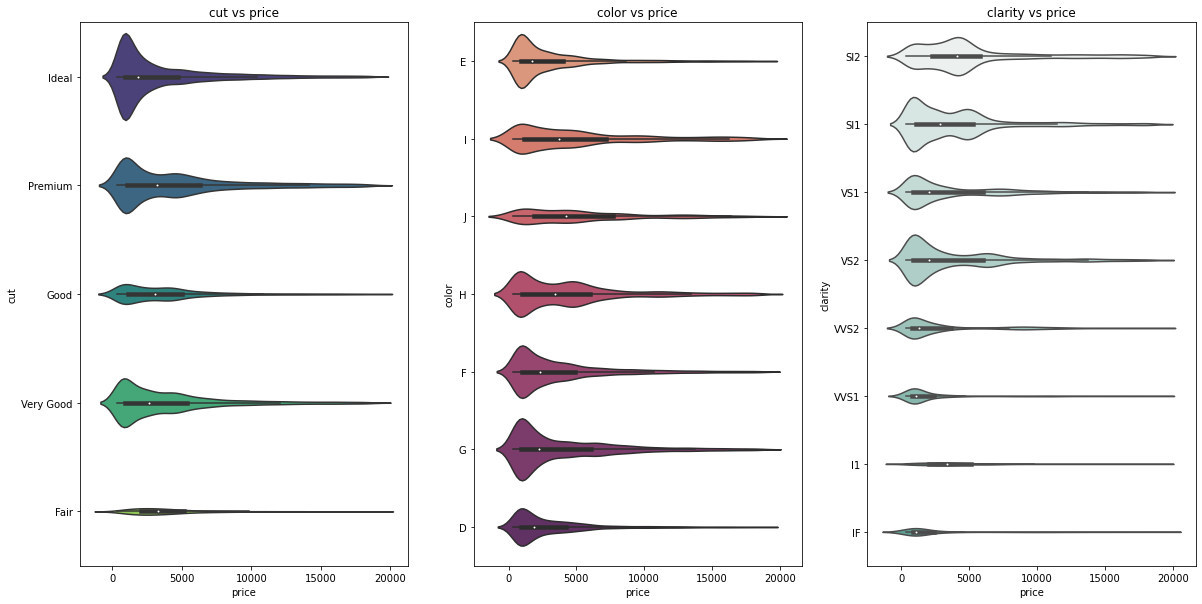

In [26]:
# plotting distribution for each categorical column
def plot_violin_plots():    
    from seaborn import violinplot

    plt.subplots(figsize=(20, 10))
    # values of palette
    cmaps = ['viridis', 'flare', 'light:#5A9']
    columns = ['cut', 'color', 'clarity']
    
    count = 1
    # plotting violin charts for each categorical variable
    for feature, cmap in zip(columns, cmaps):
        plt.subplot(1, 3, count)
    
        violinplot(data=df, x='price', y=feature, palette=cmap, orient='h', inner='box', scale='count')
        plt.title(feature + ' vs price', fontsize=12)
        count += 1

plot_violin_plots()

Violin plots are a great tool for visualzing underlying distribution of the data in a clean and simple way. It combines a box plot and a density plot. These plots are easy to read. It shows an actual box plot inside of the violin and a white dot as a median. In this case we used the <code>count</code> argument to scale the number of observations in the bins.

**Sample Conclusions**
* The most numerous diamonds with ideal cut have prices close to 1000 US dollars and the median for this cut is around 2000.
* Stones with fair cut have the least frequency in the dataframe - most likely because they are the least desirable for retail.
* In the color plot (middle), we can spot that diamonds with I color have the largest price range and the median is approximately 3500.
* The clarity chart displays largest price ranges for SI (slight inclusions) and the smallest range for IF. Flawless gems are very rare and therefore have low frequency in the dataset.

We can also aggregate frequency of entities by carat value with a 0.25 interval.

In [27]:
# count rows for 0.25 carat intervals
df.groupby(pd.cut(df['carat'], np.arange(0, df['carat'].max(), 0.25))).count().T

carat,"(0.0, 0.25]","(0.25, 0.5]","(0.5, 0.75]","(0.75, 1.0]","(1.0, 1.25]","(1.25, 1.5]","(1.5, 1.75]","(1.75, 2.0]","(2.0, 2.25]","(2.25, 2.5]","(2.5, 2.75]","(2.75, 3.0]","(3.0, 3.25]","(3.25, 3.5]","(3.5, 3.75]","(3.75, 4.0]","(4.0, 4.25]","(4.25, 4.5]","(4.5, 4.75]","(4.75, 5.0]"
price,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
carat,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
cut,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
color,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
clarity,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
depth,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
table,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
x,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
y,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0
z,785,18078,11336,6140,9806,2231,3070,475,1515,236,81,11,19,2,3,1,3,1,0,0


The most numerous are diamonds weighing in carats in range (0.25, 1]. Gems with carats above 3.25 have least quantity.

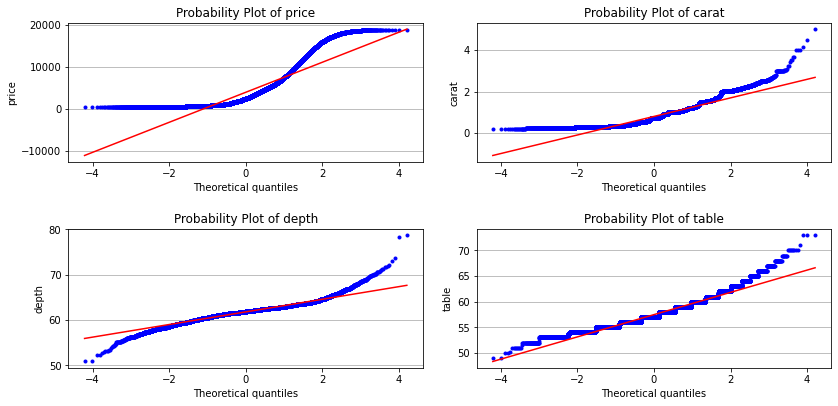

In [28]:
# probability plots for continuous data
def plot_probability_plots():
    from scipy.stats import probplot

    plt.subplots(figsize=(12, 6))
    # list of continuous features
    columns = ['price', 'carat', 'depth', 'table']
    
    count = 1
    # probability plots for continuous predictors
    for predictor in columns:
        ax = plt.subplot(2, 2, count)
        probplot(df[predictor].values, dist='norm', plot=ax, fit=True)
        ax.get_lines()[0].set_markersize(3)
        plt.title('Probability Plot of {}'.format(predictor))
        plt.tight_layout(pad=2)
        plt.ylabel(predictor)
        plt.grid(axis='y')
        count += 1
    plt.show()

plot_probability_plots()

**Probability Plots Interpretation**

* A probability plot graphs the probability of ordered values of two distributions: one is an ideal normal distribution and other is the actual distribution. Ideally the plotted points should line up along the red line showing the distribution of the data. None of these features follow a normal distribution.
* The shapes of marker distribution indicate that we need to implement polynomial regression. Fitting a first degree function into these data points is not enough.
* It is possible to fix the data distribution. We can implement statistical tests, for instance the Box-Cox power transformation. This operation transforms non-normal dependent variables (by stabilizing variance) into a normal shape. We will skip this and leave it for a next repository.

We visualized the data and gathered some insights through out data mining. We can take the next step and select the proper features for our estimators.

### 4. Relationship Exploration for Continuous Data

We will start this evaluation by plotting scatter graphs with fitted trend lines. By observing previous scatter plots, we can suppose the lines should have second order functions.

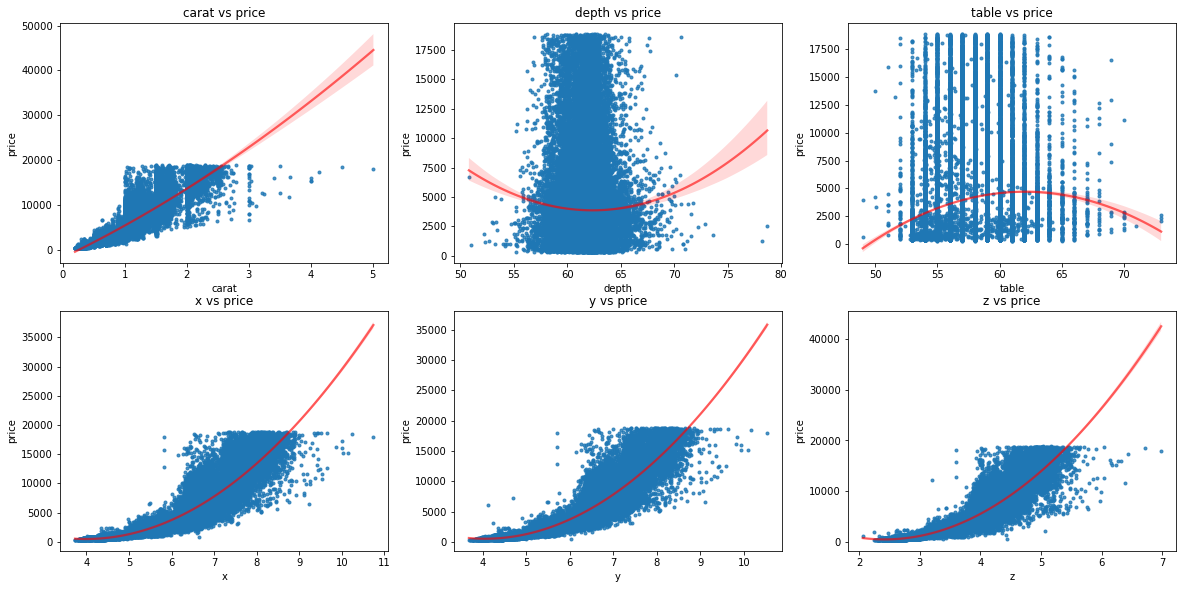

In [29]:
# plotting reg plots and fitting trend splines
def plot_reg_plots():
    from seaborn import regplot

    plt.subplots(figsize=(20, 15))
    columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
    
    count = 1
    for predictor in columns:
        plt.subplot(3, 3, count)
        regplot(data=df, x=predictor, y='price', marker='.', line_kws={'color': 'red', 'alpha': 0.6}, order=2, truncate=True)
        plt.title(predictor + ' vs ' + 'price')
        count += 1
    plt.show()

plot_reg_plots()

**Plots Interpretation**
* Scatter plots come in handy for looking for trends. Any visible relationships indicate the variable should be included into our model.
* Based on these graphs we can get a good idea about the predictor - if it will be useful or not. We confirm this by looking at the correlation value. There are no trends for <code>depth</code> and <code>table</code> columns. The other predictors can be useful for price modelling.

Another technique for visualizing trends is a heatmap. We will display one with Pearson correlations between numerical features.

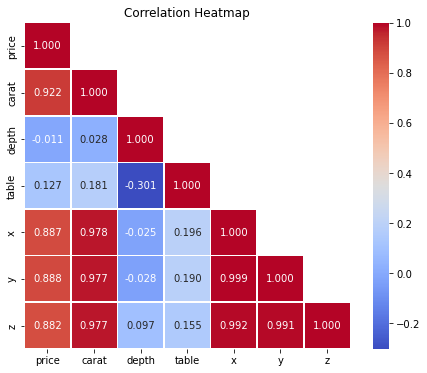

In [30]:
# plotting heatmap
def plot_heatmap():
    from seaborn import heatmap
    
    # define correlation matrix
    corr_df = df.corr(method='pearson')
    df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
    
    # plot heatmap
    plt.figure(figsize=(8, 6))
    heatmap(data=df_lt, annot=True, square=True, cbar=True, linewidths=.5, fmt='.3f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()

**Heatmap Interpretation**
* The first column from the left displays each numerical characteristics linear correlation with the target data. 
* The sign does not matter. Correlation value between [-1,0) means inversely proportional, the scatter plot will show a negative trend. Values between (0,1] means directly proportional, the scatter plot will show a positive trend.
* Correlation near 0 means no relationship or trend. The value closer to 1 or -1 indicates a strong relationship.
* If correlation value between two featues is over 0.5 in magnitude (regardless of the sign), it indicates good relationship and that the predictor should be included in the model.

Out of all continuous features, we will use for data modelling: <code>carat</code>, <code>x</code>, <code>y</code>, and <code>z</code>.

### 5. Relationship Exploration for Categorical Data

This exploration can be performed visually by plotting box plots. We can also evaluate correlations using the ANOVA statistical test.

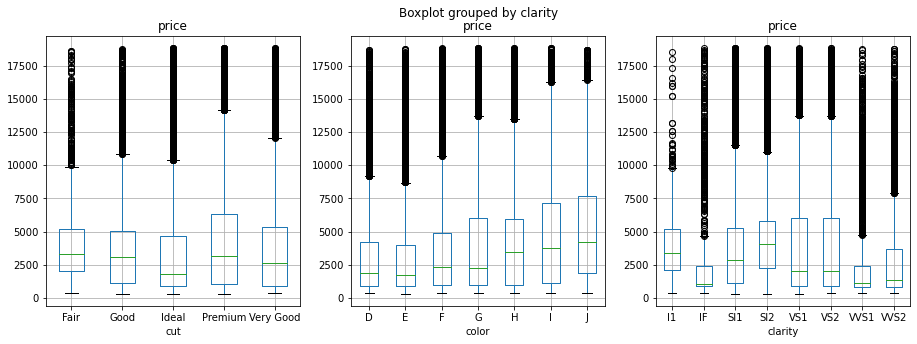

In [31]:
# plotting box plots
def plot_box_plots():
    columns = ['cut', 'color', 'clarity']
    fig, ax = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
    
    # generating box plots for each categorical feature vs price
    for predictor, i in zip(columns, range(len(columns))):
        df.boxplot(figsize=(5, 5), column='price', by=predictor, vert=True, ax=ax[i])
    plt.show()
    return
        
plot_box_plots()

**Box Plots interpretation**
* These charts are useful to find more detail about data distribution of continuous predictor in the y-axis for each of the label in the x-axis.
* If the distribution looks similar for each label - the boxes are in the same line, that means the continuous feature does not effect on the target variable. Therefore, the variables are not correlated to each other. In case we have different distribution for each category - the boxes are not in same line, we can suspect that these features might be correlated with price.
* In this dataset, all three nominal attributes look correlated with the target data and can be useful for price predicting.

We will check this and additionally evaluate our statement by performing the ANOVA test.

The ANOVA test (ANalysis Of Variance) is a method used to find out if experiment results are significant. In other words, they help figure out if we need to reject the null hypothesis or accept the alternate hypothesis.<br>
The null hypothesis ($H_0$) of this test is that the data is not significant. If the <code>P-value</code> of the test is less then the significance level (0.05) then we can reject the null hypothesis and infer that the predictor is indeed meaningless. So, if <code>P-value</code> is greater then 0.05 we will need to find the order of differencing.

In [32]:
# checking for statistical relationships with categorical predictors
def anova_test():
    from scipy.stats import f_oneway

    columns = ['cut', 'color', 'clarity']
    
    print('ANOVA Results:\n')
    for predictor in columns:
        groupby_list = df.groupby(predictor)['price'].apply(list)
        anova_results = f_oneway(*groupby_list)
        
        # if the ANOVA P-value is < 0.05, that means we reject H0
        if (anova_results[1] < 0.05):
            print(predictor, 'is correlated with target | P-value =', anova_results[1])
        else:
            print(predictor, 'is not correlated with target | P-value =', anova_results[1])

anova_test()

ANOVA Results:

cut is correlated with target | P-value = 1.800084700570961e-147
color is correlated with target | P-value = 0.0
clarity is correlated with target | P-value = 8.6796082976e-313


The results of ANOVA confirm our visual analysis using previous box plots. All our categorical variables are correlated with price: <code>cut</code>, <code>color</code>, and <code>clarity</code>. We will use them in our further regression models.

### 6. Converting Categorical Data into Numeric Values

We need to convert labels in categorical columns into numeric values (create dummy variables), otherwise our machine learning models will not work. We will start by 1 and number each higher and desirable class ascending. The categorical predictors are scaled in GIA's grading system - world’s foremost authority on diamonds, gems, colored stones, and pearls.

In [33]:
# display unique values in categorical columns
def unique_values():
    print('Cut values:', df['cut'].unique())
    print('Color values:', df['color'].unique())
    print('Clarity values:', df['clarity'].unique())
    
unique_values()

Cut values: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Color values: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Clarity values: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


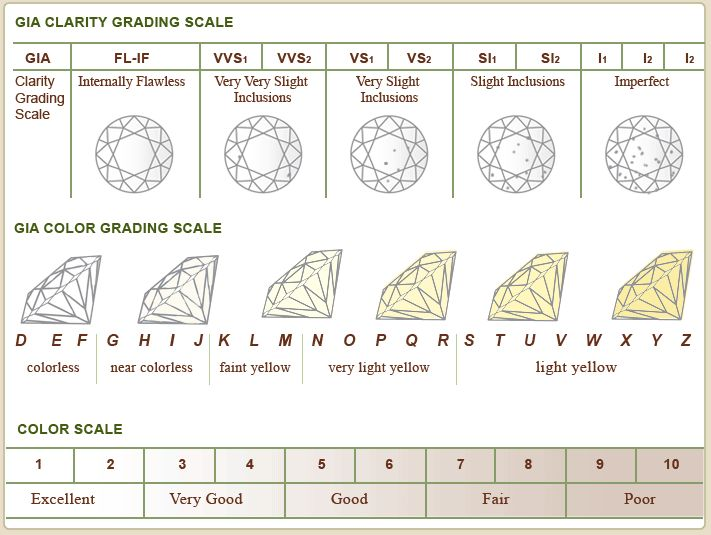

In [34]:
# replacing (mapping) the ordinal values
def map_labels():
    # fair - worst, ideal - best
    df['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}, inplace=True)
    df['color'].replace({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}, inplace=True)
    df['clarity'].replace({'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}, inplace=True)

map_labels()
df.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,5,6,3,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,6,2,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,6,4,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,2,5,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,1,3,63.3,58.0,4.34,4.35,2.75


### 7. Normalizing and Splitting Data

In general, this step is not necessary but it is a good practice to scale or standardize the characteristics for machine learning tasks. However, if we would want to use the kNN regressor further on, normalizing will be necessary. We will normalize the predictors - rescale the values into a range of [0, 1]. Next, we will split our dataset into training and validation sets and accept a 75:25 ratio. During the process we will save the feature array as a pickle file. We will need the data as reference for further model persistence.

Our $X$ feature array we will contain variables chosen previously relationship exploration:
* continuous data - <code>carat</code>, <code>x</code>, <code>y</code>, and <code>z</code>;
* categorical data - <code>cut</code>, <code>color</code>, and <code>clarity</code>.

In [35]:
# normalizing and splitting data
def normalize_split_data():
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    
    # features for X array
    features = df.drop(['price', 'depth', 'table'], axis=1)
    
    # saving X array for reference during deployment
    features.to_pickle('feature_data.pkl', compression='infer')
    
    # rescaling data
    sc = MinMaxScaler()
    sc.fit(features)
    scaled_features = sc.transform(features)
    
    global X, y, X_train, X_test, y_train, y_test
    # feature array X
    X = scaled_features
    # target data y
    y = df['price']
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, shuffle=True, random_state=3)
    
    print('Train Data:', np.size(X_train, 0), '\nTest Data:', np.size(X_test, 0))

normalize_split_data()

Train Data: 40345 
Test Data: 13449


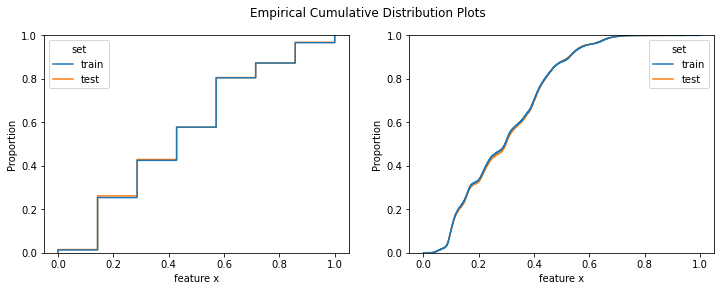

In [36]:
# checking and visualizing train-test dataset comparability
def plot_dataset_distribution():
    from seaborn import ecdfplot
    
    any_feature = 'feature x'
    # chosen variables must be continuous
    df_1 = pd.DataFrame({any_feature: np.concatenate((X_train[:, 3], X_test[:, 3])),\
                       'set': ['train'] * X_train.shape[0] + ['test'] * X_test.shape[0]})
    
    df_2 = pd.DataFrame({any_feature: np.concatenate((X_train[:, 5], X_test[:, 5])),\
                       'set': ['train'] * X_train.shape[0] + ['test'] * X_test.shape[0]})
    
    fig = plt.figure(figsize=(12, 4))
    fig.suptitle('Empirical Cumulative Distribution Plots')
    
    # subplot_1
    plt.subplot(1, 2, 1)
    ecdfplot(data=df_1, x=any_feature, stat='proportion', hue='set')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    ecdfplot(data=df_2, x=any_feature, stat='proportion', hue='set')
    plt.show()
    
plot_dataset_distribution()

For a rapid overview of the statistical comparability between training and test datasets we can plot the cumulative distribution function for each feature. In an ideal case the two sets should overlay perfectly. We can see these curves are very similar with a barely noticed shift (between 0.3 and 0.6). The distribution of the chosen variables was not distorted in the sampling procedure.

### 8. Choosing Estimators and Initial Evaluation

To complete the regression task, we will implement the following models:
* polynomial regressor,
* k-nearest neighbors regressor,
* random forest ensemble,
* AdaBoost (adaptive boosting) ensemble.

We will create a function to return expected (a priori) rate for each regressor. This function will precompute performance with cross validation scoring and assign it to the right model. The final result will be a table of rates.

In [37]:
def expected_model_evaluation():
    # importing regressors
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import AdaBoostRegressor
    
    from sklearn.model_selection import cross_val_score
    
    # performing cross validation scoring
    def evaluate_regressor(reg, metric=None):
        reg.fit(X_train, y_train)
        score = cross_val_score(reg, X, y, cv=10, scoring=metric).mean()
        return score
    
    # empty dictionary
    model_dict = {}
    
    # initializing lists
    PolyRegressor = make_pipeline(PolynomialFeatures(), LinearRegression())
    regressor_list = [PolyRegressor, KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
    regressor_name = ['Polynomial Regression', 'kNN Regression', 'Random Forest Regression', 'AdaBoost Regression']
    metric = 'neg_mean_squared_error'
    
    # creating dictionary - model: score
    for name, model in zip(regressor_name, regressor_list):
        model.fit(X_train, y_train)
        model_dict.update({name: evaluate_regressor(model, metric)})

    # creating dataframe from dictionary
    results = pd.DataFrame.from_dict([model_dict]).T.sort_values(by=0, ascending=False)
    results.columns = ['Score']
    
    # displaying results
    with pd.option_context('display.float_format', '{:0.6f}'.format):
        print(results)
        
expected_model_evaluation()

                                   Score
Random Forest Regression -1100353.049433
Polynomial Regression    -1182384.105239
kNN Regression           -1329485.309637
AdaBoost Regression      -1854083.093669


The function successfully returned excepted metrics for each chosen estimator. We should except the highest evaluation for random forest and the lowest performance for AdaBoost regression.

### 9. Polynomial Regressor

We will start with developing a polynomial regressor. This model is the most universal and basic choice for estimating continuous data. It was previously mentioned that a quadratic equation should fit perfectly into this dataset. Still, we will create a function to check it for sure and display results in a tabular form.

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# finding optimal degree for fitted function
def find_optimal_degree():
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    # empty lists
    rmse_list = []
    mae_list = []
    R2_test_list = []
    R2_train_list = []
    
    # calculating metrics for degrees between 1 and 6
    for i in range(1, 6):
        poly_reg = Pipeline(steps=[('poly', PolynomialFeatures(degree=i, include_bias=False)),
                                   ('lin', LinearRegression())])
        poly_reg.fit(X_train, y_train)
        reg_pred = poly_reg.predict(X_test)
        
        # lists of errors
        rmse_list.append(mean_squared_error(y_test, reg_pred, squared=False))
        mae_list.append(mean_absolute_error(y_test, reg_pred))
        R2_test_list.append(r2_score(y_test, reg_pred))
        R2_train_list.append(r2_score(y_train, poly_reg.predict(X_train)))
        
    # displaying results in dataframe
    deg_list = list(range(1, 6)) 
    results = pd.DataFrame(list(zip(deg_list, rmse_list, mae_list, R2_test_list, R2_train_list)),
                           columns=['Deg', 'RMSE', 'MAE', 'R2 Testing', 'R2 Training']).set_index('Deg')
    return results
    
find_optimal_degree()

,RMSE,MAE,R2 Testing,R2 Training
Deg,,,,
1,1294.437915,841.166457,0.892656,0.897316
2,978.562414,592.976490,0.938653,0.942794
3,984.990926,524.097828,0.937845,0.953750
4,11077.241609,629.490572,-6.860978,0.958174
5,179444.701282,3111.362891,-2061.882976,0.964722


Second degree spline is the best option for this dataset. Third degree is also a fine choice. Forth degree of freedom and higher will result in overfitting.

Number of Fitted Predictors: 7
Number of Coefficients: 35

#### Model Validation and Basic Metrics ####
R2 Testing Score: 0.9386534173332634
R2 Training Score: 0.9427936507425554
Max Residual: 11408.091562742811
RMSE: 978.5624135224284
MAE: 592.9764904752375

#### Accuracy Values for 10-Fold Cross Validation ####
 [76.65766419 79.32138094 84.03748256 83.48533243 84.10316979 67.5217864
 70.8362551  73.57379779 76.3309534  80.75072173]

Average Accuracy: 77.6618544329971


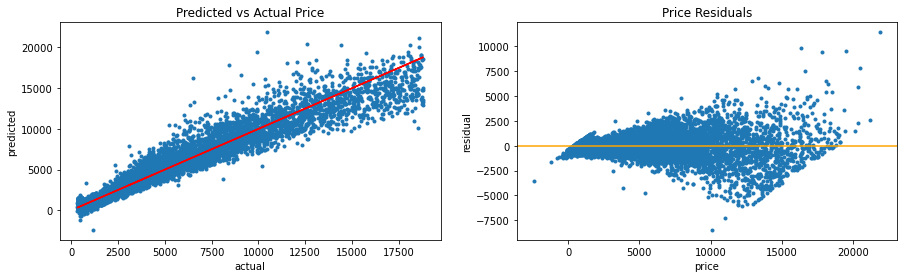

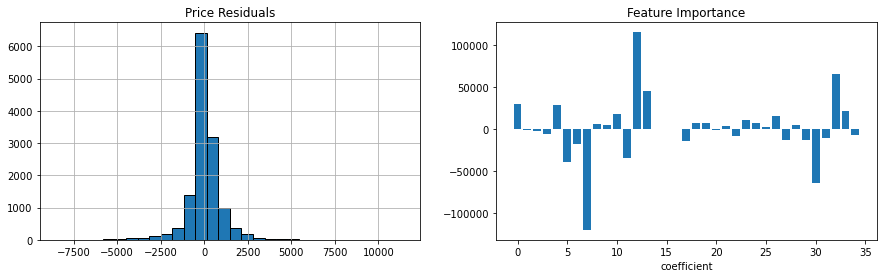

In [39]:
from sklearn.metrics import max_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# perform polynomial regression
def polynomial_regression(deg: int):
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
        
    # fitting model
    poly_reg = Pipeline(steps=[('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                               ('lin', LinearRegression())])
    poly_reg.fit(X_train, y_train)
    
    # predict prices
    reg_pred = poly_reg.predict(X_test)
    
    # number of features
    print('Number of Fitted Predictors:', poly_reg.n_features_in_)
    # number of coefficients
    print('Number of Coefficients:', poly_reg.named_steps['lin'].coef_.size)
    
    print('\n#### Model Validation and Basic Metrics ####')
    # coefficient of determination (or R^2 testing)
    print('R2 Testing Score:', r2_score(y_test, reg_pred))
    # coefficient of determination (or R^2 training)
    print('R2 Training Score:', r2_score(y_train, poly_reg.predict(X_train)))
    # max error
    print('Max Residual:', max_error(y_test, reg_pred))
    # root mean squared error
    print('RMSE:', mean_squared_error(y_test, reg_pred, squared=False))
    # mean absolute error
    print('MAE:', mean_absolute_error(y_test, reg_pred))
    
    # creating a custom function to calculate accuracy
    def accuracy_score(actual, pred):
        mape = np.mean(100 * (np.abs(actual - pred) / actual))
        # accuracy = 100 - MAPE (mean absolute percentage error)
        return(100 - mape)
    
    custom_score = make_scorer(score_func=accuracy_score, greater_is_better=True)
    accuracy_values = cross_val_score(poly_reg, X, y, cv=10, scoring=custom_score)
    
    print('\n#### Accuracy Values for 10-Fold Cross Validation ####\n', accuracy_values)
    print('\nAverage Accuracy:', accuracy_values.mean())

    # visualizing results
    plt.figure(figsize=(15, 4))
    
    # subplot_1
    plt.subplot(1, 2, 1)
    plt.scatter(x=y_test, y=reg_pred, marker='.')
    plt.plot(y_test, y_test, color='red')
    plt.title('Predicted vs Actual Price')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    residuals = reg_pred - y_test
    plt.scatter(x=reg_pred, y=residuals, marker='.')
    plt.axhline(y=0, color='orange', linestyle='-')
    plt.title('Price Residuals')
    plt.xlabel('price')
    plt.ylabel('residual')
    plt.show()
    
    plt.figure(figsize=(15, 4))
    
    # subplot_3
    plt.subplot(1, 2, 1)
    residuals.hist(bins=30, edgecolor='black')
    plt.title('Price Residuals')
    
    # subplot_4
    plt.subplot(1, 2, 2)
    importances = poly_reg.named_steps['lin'].coef_
    plt.bar([x for x in range(len(importances))], importances)
    plt.title('Feature Importance')
    plt.xlabel('coefficient')
    plt.show()
      
polynomial_regression(deg=2)

**Results Interpretation**
* The $R^2$ scores for testing and training are not very varied which is a good sign. This indicates that there is no overfitting on either training and test sets. The model is well balanced and learns properly.
* To measure the accuracy of this estimator, we performed the k-fold cross validation algorithm. We divided our data into 10 equal parts and computed accuracy for each one. A custom function was created to count the accuracy based on mean absolute percentage error. The final metric is the mean/average accuracy for all 10 parts.
* The results have been visualized. In an ideal case the data points should form a straight line (with π/2 slope). The residuals oscillates around zero. Their is positive skewness.
* We used the polynomials coefficients to summarize feature importance. Coefficients can be used directly as a crude type of feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model. Unfortunately, this plot has no clear pattern of important and unimportant variables.

### 10. k-Nearest Neighbors Regressor

Another simple and versatile regressor we will develop is the kNN regressor. The target is estimated by local interpolation of the targets associated of the nearest neighbors in the training set. The most important and core deciding hyperparameter in kNN regressor is the number of neighbors. The substantial *k* is better for forecasting as it leads to smoothening the decision boundaries. We will create a function to precompute this value.

For k = 1: 	RMSE = 749.439028, 	R2 Testing = 0.964018
For k = 2: 	RMSE = 662.649526, 	R2 Testing = 0.971869
For k = 3: 	RMSE = 648.379832, 	R2 Testing = 0.973068
For k = 4: 	RMSE = 646.334205, 	R2 Testing = 0.973237
For k = 5: 	RMSE = 646.150641, 	R2 Testing = 0.973253
For k = 6: 	RMSE = 649.174462, 	R2 Testing = 0.973002
For k = 7: 	RMSE = 662.311475, 	R2 Testing = 0.971898
For k = 8: 	RMSE = 671.230691, 	R2 Testing = 0.971136
For k = 9: 	RMSE = 677.968403, 	R2 Testing = 0.970554
For k = 10: 	RMSE = 687.451667, 	R2 Testing = 0.969724
For k = 11: 	RMSE = 691.434210, 	R2 Testing = 0.969372
For k = 12: 	RMSE = 697.823886, 	R2 Testing = 0.968804
For k = 13: 	RMSE = 705.991214, 	R2 Testing = 0.968069
For k = 14: 	RMSE = 711.795722, 	R2 Testing = 0.967542
For k = 15: 	RMSE = 719.661782, 	R2 Testing = 0.966820
For k = 16: 	RMSE = 724.675385, 	R2 Testing = 0.966357
For k = 17: 	RMSE = 730.381346, 	R2 Testing = 0.965825
For k = 18: 	RMSE = 737.168100, 	R2 Testing = 0.965187
For k = 19: 	RMSE =

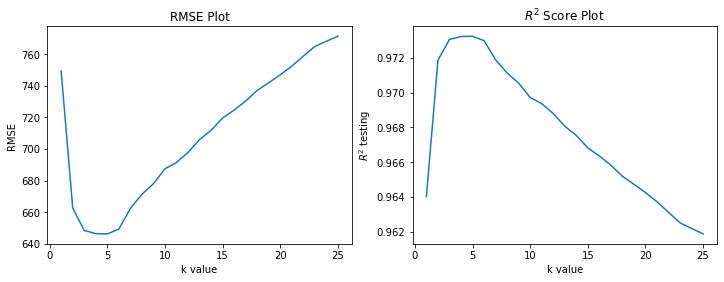

Minimum RMSE is For k = 5
Maximum R2 Score is For k = 5


In [40]:
# finding optimal number of neighbors
def find_optimal_k():
    from sklearn.neighbors import KNeighborsRegressor
    
    # empty lists
    rmse_list = []
    R2_list = []
    
    # calculate metrics for k values between 1 and 25
    for i in range(1, 26):
        knn_reg = KNeighborsRegressor(n_neighbors=i)
        knn_reg.fit(X_train, y_train)
        knn_pred = knn_reg.predict(X_test)
        
        # lists of scores
        rmse = mean_squared_error(y_test, knn_pred, squared=False)
        R2_test = r2_score(y_test, knn_pred)
        
        rmse_list.append(mean_squared_error(y_test, knn_pred, squared=False))
        R2_list.append(r2_score(y_test, knn_pred))
       
        print('For k = {}: \tRMSE = {:.6f}, \tR2 Testing = {:.6f}'.format(i, rmse, R2_test))
        
    # visualize results
    fig = plt.figure(figsize=(12, 4))
    
    # subplot_1
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 26), rmse_list)
    plt.title('RMSE Plot')
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 26), R2_list)
    plt.title('$R^2$ Score Plot')
    plt.xlabel('k value')
    plt.ylabel('$R^2$ testing')
    plt.show()
    
    k1 = rmse_list.index(min(rmse_list)) + 1
    k2 = R2_list.index(max(R2_list)) + 1
    print('Minimum RMSE is For k =', k1)
    print('Maximum R2 Score is For k =', k2)
    
find_optimal_k()

Number of Fitted Predictors: 7

#### Model Validation and Basic Metrics ####
R2 Testing Score: 0.9732526430409075
R2 Training Score: 0.982800364620402
Max Residual: 7688.200000000001
RMSE: 646.1506414004856
MAE: 318.38502490891517

#### Accuracy Values for 10-Fold Cross Validation ####
 [84.08480734 87.11345691 86.41160168 83.94527663 81.50417733 82.22382924
 83.85618429 82.74308029 83.74917906 84.62105971]

Average Accuracy: 84.02526524720888


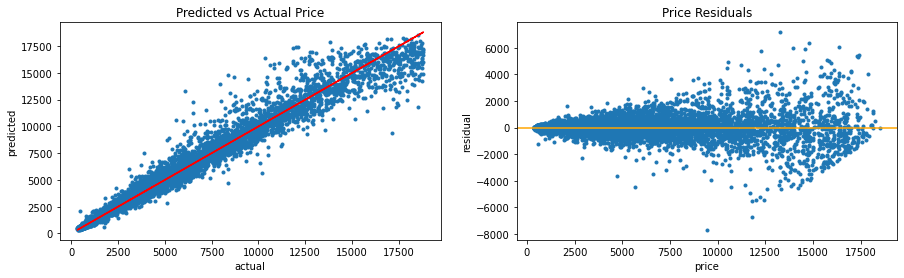

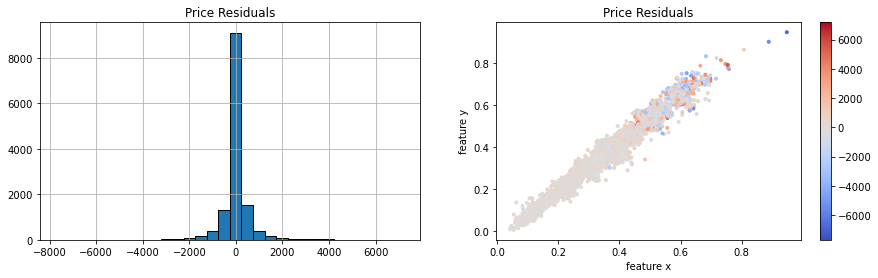

In [41]:
# perform kNN regression
def kneighbors_regression(k: int):
    from sklearn.neighbors import KNeighborsRegressor
        
    # fitting model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    
    # predict prices
    knn_pred = knn_reg.predict(X_test)
    
    # number of features
    print('Number of Fitted Predictors:', knn_reg.n_features_in_)
    
    print('\n#### Model Validation and Basic Metrics ####')
    # coefficient of determination (or R^2 testing)
    print('R2 Testing Score:', r2_score(y_test, knn_pred))
    # coefficient of determination (or R^2 training)
    print('R2 Training Score:', r2_score(y_train, knn_reg.predict(X_train)))
    # max error
    print('Max Residual:', max_error(y_test, knn_pred))
    # root mean squared error
    print('RMSE:', mean_squared_error(y_test, knn_pred, squared=False))
    # mean absolute error
    print('MAE:', mean_absolute_error(y_test, knn_pred))
    
    # creating a custom function to calculate accuracy
    def accuracy_score(actual, pred):
        mape = np.mean(100 * (np.abs(actual - pred) / actual))
        # accuracy = 100 - MAPE (mean absolute percentage error)
        return(100 - mape)
    
    custom_score = make_scorer(score_func=accuracy_score, greater_is_better=True)
    accuracy_values = cross_val_score(knn_reg, X, y, cv=10, scoring=custom_score)
    
    print('\n#### Accuracy Values for 10-Fold Cross Validation ####\n', accuracy_values)
    print('\nAverage Accuracy:', accuracy_values.mean())

    # visualizing results
    plt.figure(figsize=(15, 4))
    
    # subplot_1
    plt.subplot(1, 2, 1)
    plt.scatter(x=y_test, y=knn_pred, marker='.')
    plt.plot(y_test, y_test, color='red')
    plt.title('Predicted vs Actual Price')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    residuals = knn_pred - y_test
    plt.scatter(x=knn_pred, y=residuals, marker='.')
    plt.axhline(y=0, color='orange', linestyle='-')
    plt.title('Price Residuals')
    plt.xlabel('price')
    plt.ylabel('residual')
    plt.show()
    
    plt.figure(figsize=(15, 4))
    
    # subplot_3
    plt.subplot(1, 2, 1)
    residuals.hist(bins=30, edgecolor='black')
    plt.title('Price Residuals')
    
    # subplot_4
    plt.subplot(1, 2, 2)
    plt.scatter(x=X_test[:, -1], y=X_test[:, -2], c=residuals, marker='.', cmap='coolwarm')
    plt.title('Price Residuals')
    plt.xlabel('feature x')
    plt.ylabel('feature y')
    plt.colorbar()
    plt.show()
      
kneighbors_regression(k=5)

**Results Interpretation**
* The evaluation metrics for this estimator definately improved. The maximum error reduced significantly and overall accuracy increased.
* An improvement of the kNN regressor is also visible on plots. Predicted prices versus actual have more linear distribution.  The residuals have a smaller range and are much symmetrically deployed over zero value.
* The histogram shows slight positive skewness. The kNN estimator returned approximately 2000 more correct prices (residuals with zero value) relative to the previous one.
* Variable importance is not defined for the kNN regression algorithm. Instead, we generated a scatter plot to get an overview of residuals based on marker colors. Most forecasted values have differences close to 0.0.

### 11. Random Forest Ensemble

The random forest ensemble algorithm is used in a wide range of classification and regression predictive modelling problems. It is perhaps one of the most popular and widely used machine learning method. This verstile estimator fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over fitting.

It has a long list of hyperparameters but we will focus on the two most important:
* <code>n_estimators</code> - number of trees in the forest, usually the higher the number of trees the better to learn the data. However, adding too much trees slows down the training process considerably.
* <code>max_depth</code> - maximum depth of the tree - the deeper the tree, the more splits it has and it captures more information about the data. 

For Max Depth = 1: 	R2 Training = 0.603819, 	R2 Testing = 0.609883
For Max Depth = 2: 	R2 Training = 0.826115, 	R2 Testing = 0.832061
For Max Depth = 3: 	R2 Training = 0.891402, 	R2 Testing = 0.896563
For Max Depth = 4: 	R2 Training = 0.920009, 	R2 Testing = 0.924144
For Max Depth = 5: 	R2 Training = 0.940761, 	R2 Testing = 0.945276
For Max Depth = 6: 	R2 Training = 0.957390, 	R2 Testing = 0.960826
For Max Depth = 7: 	R2 Training = 0.966625, 	R2 Testing = 0.970149
For Max Depth = 8: 	R2 Training = 0.973428, 	R2 Testing = 0.976968
For Max Depth = 9: 	R2 Training = 0.977245, 	R2 Testing = 0.981271
For Max Depth = 10: 	R2 Training = 0.979507, 	R2 Testing = 0.984599
For Max Depth = 11: 	R2 Training = 0.980518, 	R2 Testing = 0.987198
For Max Depth = 12: 	R2 Training = 0.980933, 	R2 Testing = 0.989431
For Max Depth = 13: 	R2 Training = 0.981005, 	R2 Testing = 0.991321
For Max Depth = 14: 	R2 Training = 0.980931, 	R2 Testing = 0.993033
For Max Depth = 15: 	R2 Training = 0.980779, 	R2 Testing 

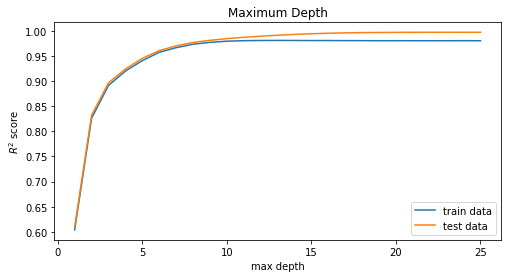

In [42]:
# visualizing performance for each max depth
def find_optimal_max_depth():
    from sklearn.ensemble import RandomForestRegressor
    
    #empty lists
    R2_train = []
    R2_test = []

    # calculating R2 scores for each max_depth in range
    for i in range(1, 26):
        rfr = RandomForestRegressor(max_depth=i)
        rfr.fit(X_train, y_train)
        
        # list of scores
        R2_train_score = r2_score(y_test, rfr.predict(X_test))
        R2_test_score = r2_score(y_train, rfr.predict(X_train))
        
        R2_train.append(r2_score(y_test, rfr.predict(X_test)))
        R2_test.append(r2_score(y_train, rfr.predict(X_train)))
        
        print('For Max Depth = {}: \tR2 Training = {:.6f}, \tR2 Testing = {:.6f}'.format(i, R2_train_score, R2_test_score))

    # plotting results
    plt.figure(figsize=(8, 4))
    plt.plot(list(range(1, 26)), R2_train, label='train data')
    plt.plot(list(range(1, 26)), R2_test, label='test data')
    plt.title('Maximum Depth')
    plt.xlabel('max depth')
    plt.ylabel('$R^2$ score')
    plt.legend()
    plt.show()
                       
find_optimal_max_depth()

It seems that we can stop at 13 for maximum depth. The regressor works very good both in predicting new prices and in findings for new data. Applying any higher value does not make much sense. The scores are parallel and the model performance does not increase further.

For 2 Trees: 	RMSE Training = 355.375119, 	RMSE Testing = 675.828074
For 4 Trees: 	RMSE Training = 293.999287, 	RMSE Testing = 603.105476
For 6 Trees: 	RMSE Training = 266.051757, 	RMSE Testing = 585.699575
For 8 Trees: 	RMSE Training = 250.101598, 	RMSE Testing = 583.251373
For 10 Trees: 	RMSE Training = 241.515774, 	RMSE Testing = 583.876008
For 12 Trees: 	RMSE Training = 237.986326, 	RMSE Testing = 574.057398
For 14 Trees: 	RMSE Training = 231.798513, 	RMSE Testing = 566.392225
For 16 Trees: 	RMSE Training = 230.370071, 	RMSE Testing = 568.059634
For 18 Trees: 	RMSE Training = 226.045965, 	RMSE Testing = 563.189922
For 20 Trees: 	RMSE Training = 224.269563, 	RMSE Testing = 559.292208
For 22 Trees: 	RMSE Training = 221.970323, 	RMSE Testing = 563.041709
For 24 Trees: 	RMSE Training = 219.802151, 	RMSE Testing = 560.610309
For 26 Trees: 	RMSE Training = 218.985213, 	RMSE Testing = 559.374426
For 28 Trees: 	RMSE Training = 218.788552, 	RMSE Testing = 563.197974
For 30 Trees: 	RMSE Trai

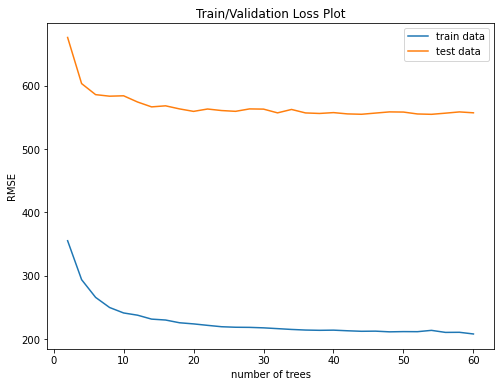

In [43]:
# visualizing performance for number of estimators
def train_test_loss():
    from sklearn.ensemble import RandomForestRegressor
    
    # empty lists
    estimators = []
    train_loss = []
    test_loss = []
    
    rfr = RandomForestRegressor(n_estimators=2)
    
    # computing RMSE for number of trees between 2 and 60
    for n in range(2, 62, 2):
        rfr.fit(X_train, y_train)
        y_train_pred = rfr.predict(X_train)
        y_test_pred = rfr.predict(X_test)
        
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        
        print('For {} Trees: \tRMSE Training = {:.6f}, \tRMSE Testing = {:.6f}'.format(n, rmse_train, rmse_test))
        
        # appending lists
        estimators += [rfr.n_estimators]
        train_loss += [rmse_train]
        test_loss += [rmse_test]
        rfr.n_estimators += 2
    
    # plotting results
    plt.figure(figsize=(8, 6))
    plt.plot(estimators, train_loss, label='train data')
    plt.plot(estimators, test_loss, label='test data')
    plt.title('Train/Validation Loss Plot')
    plt.xlabel('number of trees')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    
train_test_loss()

50 decision trees should be enough for this model. We can notice stagnation for higher number of estimators. We don't want the regressor to learn too slow and a larger hyperparameter requires much more computer memory for preprocessing.

Number of Fitted Predictors: 7

#### Feature Importances ####
[0.63038385 0.00186055 0.02991937 0.06404432 0.00366374 0.26533825
 0.00478993]

#### Model Validation and Basic Metrics ####
R2 Testing Score: 0.9808190879376673
R2 Training Score: 0.9912893399177057
Max Residual: 5766.1906637813845
RMSE: 547.1771714389149
MAE: 278.1652628630103

#### Accuracy Values for 10-Fold Cross Validation ####
 [86.0218273  88.29451222 87.46914335 85.76470437 82.56943545 83.99209962
 86.54572039 84.86411731 84.90933034 86.76936984]

Average Accuracy: 85.7200260199002


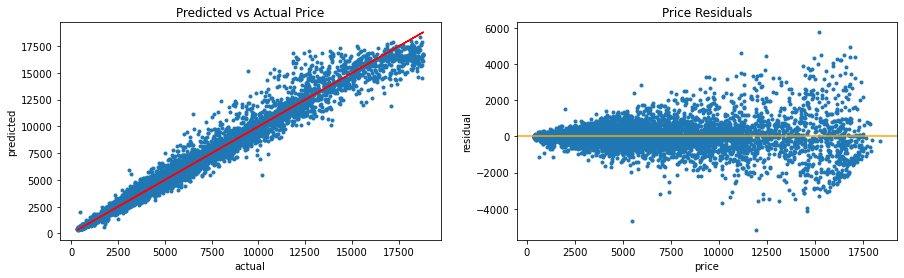

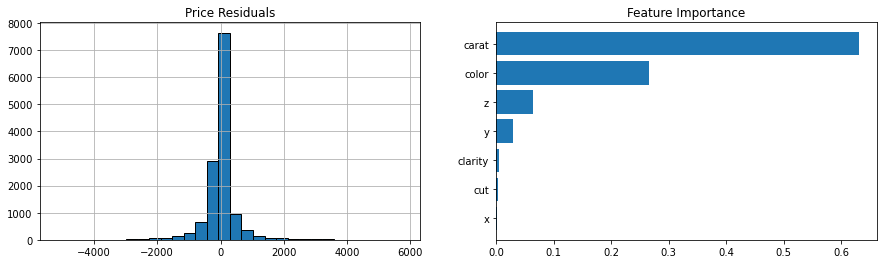

In [44]:
# perform random forest regression
def randomforest_regression(max_depth: int, n_estimators: int):
    from sklearn.ensemble import RandomForestRegressor
        
    # fitting model
    rfr_reg = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, criterion='mse')
    rfr_reg.fit(X_train, y_train)
    rfr_pred = rfr_reg.predict(X_test)
    
    # number of features
    print('Number of Fitted Predictors:', rfr_reg.n_features_in_)
    
    print('\n#### Feature Importances ####')
    print(rfr_reg.feature_importances_)
    
    print('\n#### Model Validation and Basic Metrics ####')
    # coefficient of determination (or R^2 testing)
    print('R2 Testing Score:', r2_score(y_test, rfr_pred))
    # coefficient of determination (or R^2 training)
    print('R2 Training Score:', r2_score(y_train, rfr_reg.predict(X_train)))
    # max error
    print('Max Residual:', max_error(y_test, rfr_pred))
    # root mean squared error
    print('RMSE:', mean_squared_error(y_test, rfr_pred, squared=False))
    # mean absolute error
    print('MAE:', mean_absolute_error(y_test, rfr_pred))
    
    # creating a custom function to calculate accuracy
    def accuracy_score(actual, pred):
        mape = np.mean(100 * (np.abs(actual - pred) / actual))
        # accuracy = 100 - MAPE (mean absolute percentage error)
        return(100 - mape)
    
    custom_score = make_scorer(score_func=accuracy_score, greater_is_better=True)
    accuracy_values = cross_val_score(rfr_reg, X, y, cv=10, scoring=custom_score)
    
    print('\n#### Accuracy Values for 10-Fold Cross Validation ####\n', accuracy_values)
    print('\nAverage Accuracy:', accuracy_values.mean())

    # visualizing results
    plt.figure(figsize=(15, 4))
    
    # subplot_1
    plt.subplot(1, 2, 1)
    plt.scatter(x=y_test, y=rfr_pred, marker='.')
    plt.plot(y_test, y_test, color='red')
    plt.title('Predicted vs Actual Price')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    residuals = rfr_pred - y_test
    plt.scatter(x=rfr_pred, y=residuals, marker='.')
    plt.axhline(y=0, color='orange', linestyle='-')
    plt.title('Price Residuals')
    plt.xlabel('price')
    plt.ylabel('residual')
    
    plt.figure(figsize=(15, 4))
    
    # subplot_3
    plt.subplot(1, 2, 1)
    residuals.hist(bins=30, edgecolor='black')
    plt.title('Price Residuals')
    
    # subplot_4
    plt.subplot(1, 2, 2)
    importances = rfr_reg.feature_importances_
    indices = np.argsort(importances)
    names = ['carat', 'color', 'z', 'y', 'clarity', 'cut', 'x'][::-1]
    plt.barh(range(X.shape[1]), importances[indices])
    plt.yticks(range(X.shape[1]), labels=names)
    plt.title('Feature Importance')
    plt.show()
    
randomforest_regression(max_depth=13, n_estimators=50)

**Results Interpretation**
* The evaluation metrics for this regressor are highest so far. The errors decreased and overall accuracy has higher score.
* The price residuals are much more evenly distributed than in the polynomial case. The returned distribution is very similar as in the previous kNN technique. The error range is much smaller. There is definately much more positive skewness.
* The random forest algorithm returns feature importance of the forest. We visualized the importance with a horizontal bar chart. Again, we can notice that diamond weight had the largest impact for decison making. The least value and almost negligible for this model were columns: <code>clarity</code>, <code>cut</code>, and <code>x</code>. Probably price forecasting without these features would return similar performance.

### 12. AdaBoost Ensemble

The AdaBoost (adaptive boosting) is another ensemble method, meaning that the predictors are aggregated to identify the most popular result. It is used for both regression and classification problems. Boosting is a class of ensemble machine learning algorithms that involve combining the predictions from many weak learners. This algorithm involves using very short (one-level) decision trees as weak learners that are added sequentially to the ensemble. Each subsequent model attempts to correct the predictions made by the model before it in the sequence. This is achieved by weighing the training dataset to put more focus on training examples on which prior models made prediction errors.

AdaBoost regressor is easy to implement and does not have much arguments. Adaptive boosting uses two main hyperparameters:
* <code>learning_rate</code> - weight applied to each regressor at each boosting iteration. Values must be a float in range (0, 1] and a higher learning rate increases the contribution of each regressor.
* <code>n_estimators</code> - number of decision trees used in the ensemble, each decision tree used in the ensemble is designed to be a weak learner. That is, it has skill over random prediction, but is not highly skillful. As such, one-level decision trees are used, called decision stumps. The number of estimators added to the model usually should be high for the model to work properly.

Another interesting property of this method is that it allows the user to set a base estimator from which the boosted ensemble is built. By default, the base estimator is a decision tree regressor. Setting an accurate base estimator is vital to achieve accurate results and good performance. This is why optimization can be tricky in adaptive boosting.

We will start by developing a function using the <code>GridSearchCV</code> module to explore for best parameters. This function will return optimal constants for the default decision tree regressor which will be then implemented into the AdaBoost regressor.

In [45]:
# find optimal parameters for base estimator
def gridsearch_decision_tree():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV
    
    # initializing regressor
    dec_tree_reg = DecisionTreeRegressor()
    dec_tree_reg.fit(X_train, y_train)
    
    # grid of hyperparameters for tuning
    parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # tuning process
    tuning_mod = GridSearchCV(dec_tree_reg, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=1)
    tuning_mod.fit(X_train, y_train)
    
    print('\n#### Best Parameters ####')
    print(tuning_mod.best_params_)
    
gridsearch_decision_tree()

Fitting 3 folds for each of 120 candidates, totalling 360 fits

#### Best Parameters ####
{'max_depth': 12, 'min_samples_leaf': 8}


For Learning Rate = 0.01: 	R2 Training = 0.980456, 	R2 Testing = 0.987224
For Learning Rate = 0.02: 	R2 Training = 0.980552, 	R2 Testing = 0.987718
For Learning Rate = 0.03: 	R2 Training = 0.980302, 	R2 Testing = 0.988198
For Learning Rate = 0.04: 	R2 Training = 0.980354, 	R2 Testing = 0.988458
For Learning Rate = 0.05: 	R2 Training = 0.980443, 	R2 Testing = 0.988802
For Learning Rate = 0.06: 	R2 Training = 0.980540, 	R2 Testing = 0.989193
For Learning Rate = 0.07: 	R2 Training = 0.980509, 	R2 Testing = 0.989556
For Learning Rate = 0.08: 	R2 Training = 0.980355, 	R2 Testing = 0.989839
For Learning Rate = 0.09: 	R2 Training = 0.980557, 	R2 Testing = 0.990053
For Learning Rate = 0.10: 	R2 Training = 0.980400, 	R2 Testing = 0.990008
For Learning Rate = 0.11: 	R2 Training = 0.980382, 	R2 Testing = 0.990423
For Learning Rate = 0.12: 	R2 Training = 0.980390, 	R2 Testing = 0.990391
For Learning Rate = 0.13: 	R2 Training = 0.980243, 	R2 Testing = 0.990759
For Learning Rate = 0.14: 	R2 Training

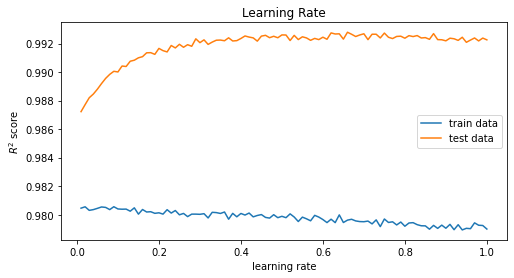

In [46]:
# visualizing performance for each learning rate
def find_optimal_learning_rate():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    
    # base estimator
    base_reg = DecisionTreeRegressor(max_depth=12, min_samples_leaf=8)
    
    #empty lists
    R2_train = []
    R2_test = []

    # calculating R2 scores for each learning_rate in range
    for i in np.arange(0.01, 1.01, 0.01):
        adr = AdaBoostRegressor(base_estimator=base_reg, learning_rate=i)
        adr.fit(X_train, y_train)
        
        # list of scores
        R2_train_score = r2_score(y_test, adr.predict(X_test))
        R2_test_score = r2_score(y_train, adr.predict(X_train))
        
        R2_train.append(r2_score(y_test, adr.predict(X_test)))
        R2_test.append(r2_score(y_train, adr.predict(X_train)))
        
        print('For Learning Rate = {:.2f}: \tR2 Training = {:.6f}, \tR2 Testing = {:.6f}'
              .format(i, R2_train_score, R2_test_score))

    # plotting results
    plt.figure(figsize=(8, 4))
    plt.plot(list(np.arange(0.01, 1.01, 0.01)), R2_train, label='train data')
    plt.plot(list(np.arange(0.01, 1.01, 0.01)), R2_test, label='test data')
    plt.title('Learning Rate')
    plt.xlabel('learning rate')
    plt.ylabel('$R^2$ score')
    plt.legend()
    plt.show()
                       
find_optimal_learning_rate()

In this case the ninth iteration (0.09 rate) should be the best choice. We can notice on the graph that with next iterations the $R^2$ training scores slightly decrease, meaning that the estimator's learning ability falls.

For 5 Trees: 	RMSE Training = 452.498981, 	RMSE Testing = 579.776214
For 10 Trees: 	RMSE Training = 420.445906, 	RMSE Testing = 576.617998
For 15 Trees: 	RMSE Training = 404.412548, 	RMSE Testing = 573.474295
For 20 Trees: 	RMSE Training = 399.124978, 	RMSE Testing = 569.121507
For 25 Trees: 	RMSE Training = 395.678336, 	RMSE Testing = 569.788557
For 30 Trees: 	RMSE Training = 395.793869, 	RMSE Testing = 568.840319
For 35 Trees: 	RMSE Training = 393.223184, 	RMSE Testing = 572.390292
For 40 Trees: 	RMSE Training = 392.558878, 	RMSE Testing = 571.720031
For 45 Trees: 	RMSE Training = 397.235142, 	RMSE Testing = 578.454540
For 50 Trees: 	RMSE Training = 404.755318, 	RMSE Testing = 576.985612
For 55 Trees: 	RMSE Training = 402.512046, 	RMSE Testing = 580.677368
For 60 Trees: 	RMSE Training = 403.589221, 	RMSE Testing = 581.947273
For 65 Trees: 	RMSE Training = 416.212999, 	RMSE Testing = 596.894669
For 70 Trees: 	RMSE Training = 418.566900, 	RMSE Testing = 595.768018
For 75 Trees: 	RMSE T

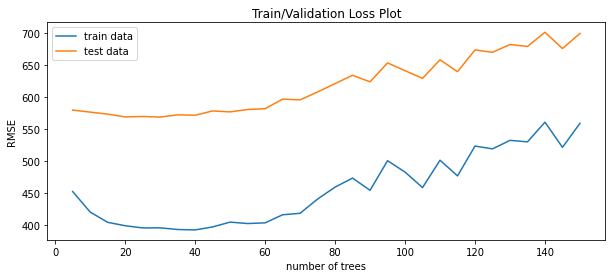

In [47]:
# visualizing performance for number of estimators
def train_test_loss():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    
    # base estimator
    base_reg = DecisionTreeRegressor(max_depth=11, min_samples_leaf=8)
    
    # empty lists
    estimators = []
    train_loss = []
    test_loss = []
    
    abr = AdaBoostRegressor(base_estimator=base_reg, n_estimators=5)
    
    # computing RMSE for number of trees between 5 and 150
    for n in range(5, 155, 5):
        abr.fit(X_train, y_train)
        y_train_pred = abr.predict(X_train)
        y_test_pred = abr.predict(X_test)
        
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        
        print('For {} Trees: \tRMSE Training = {:.6f}, \tRMSE Testing = {:.6f}'.format(n, rmse_train, rmse_test))
        
        # appending lists
        estimators += [abr.n_estimators]
        train_loss += [rmse_train]
        test_loss += [rmse_test]
        abr.n_estimators += 5
    
    # plotting results
    plt.figure(figsize=(10, 4))
    plt.plot(estimators, train_loss, label='train data')
    plt.plot(estimators, test_loss, label='test data')
    plt.title('Train/Validation Loss Plot')
    plt.xlabel('number of trees')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    
train_test_loss()

We will provide 40 decision estimators in the training process.

Number of Fitted Predictors: 7
Base Estimator: DecisionTreeRegressor(max_depth=12, min_samples_leaf=8)

#### Feature Importances ####
[0.29726619 0.00187798 0.03110983 0.05984197 0.00721332 0.59691548
 0.00577522]

#### Model Validation and Basic Metrics ####
R2 Testing Score: 0.9805040557835581
R2 Training Score: 0.9894326855282847
Max Residual: 5462.083333333334
RMSE: 551.6523590456692
MAE: 288.22511508210965

#### Accuracy Values for 10-Fold Cross Validation ####
 [84.35362369 87.56291314 86.35291244 84.03921767 79.79560386 82.10547141
 85.11041525 83.7645422  83.71749164 85.3156374 ]

Average Accuracy: 84.21178286970135


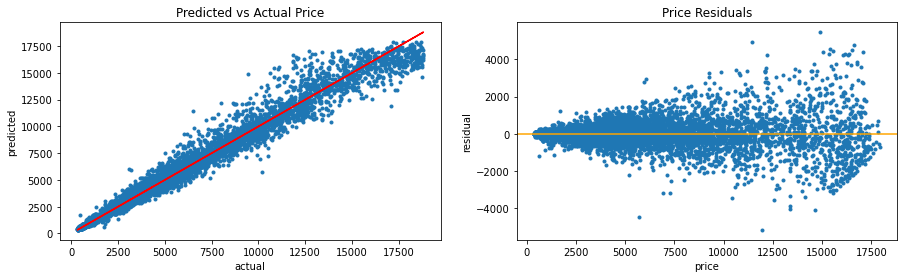

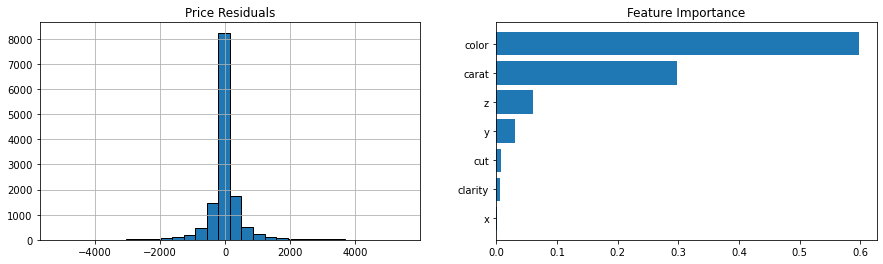

In [48]:
# perform adaptive boosting regression
def adaboost_regression(learning_rate: float, n_estimators: int):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    
    # base estimator
    base_reg = DecisionTreeRegressor(max_depth=12, min_samples_leaf=8)
    
    # fitting model
    abr_reg = AdaBoostRegressor(base_estimator=base_reg, learning_rate=learning_rate, n_estimators=n_estimators)
    abr_reg.fit(X_train, y_train)
    abr_pred = abr_reg.predict(X_test)
    
    # number of features
    print('Number of Fitted Predictors:', abr_reg.n_features_in_)
    print('Base Estimator:', abr_reg.base_estimator_)
    
    print('\n#### Feature Importances ####')
    print(abr_reg.feature_importances_)
    
    print('\n#### Model Validation and Basic Metrics ####')
    # coefficient of determination (or R^2 testing)
    print('R2 Testing Score:', r2_score(y_test, abr_pred))
    # coefficient of determination (or R^2 training)
    print('R2 Training Score:', r2_score(y_train, abr_reg.predict(X_train)))
    # max error
    print('Max Residual:', max_error(y_test, abr_pred))
    # root mean squared error
    print('RMSE:', mean_squared_error(y_test, abr_pred, squared=False))
    # mean absolute error
    print('MAE:', mean_absolute_error(y_test, abr_pred))
    
    # creating a custom function to calculate accuracy
    def accuracy_score(actual, pred):
        mape = np.mean(100 * (np.abs(actual - pred) / actual))
        # accuracy = 100 - MAPE (mean absolute percentage error)
        return(100 - mape)
    
    custom_score = make_scorer(score_func=accuracy_score, greater_is_better=True)
    accuracy_values = cross_val_score(abr_reg, X, y, cv=10, scoring=custom_score)
    
    print('\n#### Accuracy Values for 10-Fold Cross Validation ####\n', accuracy_values)
    print('\nAverage Accuracy:', accuracy_values.mean())

    # visualizing results
    plt.figure(figsize=(15, 4))
    
    # subplot_1
    plt.subplot(1, 2, 1)
    plt.scatter(x=y_test, y=abr_pred, marker='.')
    plt.plot(y_test, y_test, color='red')
    plt.title('Predicted vs Actual Price')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    # subplot_2
    plt.subplot(1, 2, 2)
    residuals = abr_pred - y_test
    plt.scatter(x=abr_pred, y=residuals, marker='.')
    plt.axhline(y=0, color='orange', linestyle='-')
    plt.title('Price Residuals')
    plt.xlabel('price')
    plt.ylabel('residual')
    plt.show()
    
    plt.figure(figsize=(15, 4))
    
    # subplot_3
    plt.subplot(1, 2, 1)
    residuals.hist(bins=30, edgecolor='black')
    plt.title('Price Residuals')
    
    # subplot_4
    plt.subplot(1, 2, 2)
    importances = abr_reg.feature_importances_
    indices = np.argsort(importances)
    names = ['color', 'carat', 'z', 'y', 'cut', 'clarity', 'x'][::-1]
    plt.barh(range(X.shape[1]), importances[indices])
    plt.yticks(range(X.shape[1]), labels=names)
    plt.title('Feature Importance')
    plt.show()
      
adaboost_regression(learning_rate=0.09, n_estimators=40)

**Results Interpretation**

* Both the random forest and AdaBoost regressors performed very similarly which should not come in surprise. These algorithms are based on decision tree learning which involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. Their evaluation scores are very close.
* Unlike random forest, the adaptive boosting model picked <code>color</code> as the most important feature. The <code>carat</code> variable was the core decision maker in the previous estimator. Just like in random forest method, <code>clarity</code>, <code>cut</code>, and <code>x</code> do not bring much importance in price predicting.
* In this case the residuals are the most symmetrically distributed. Their range of values is pretty much the same. There is very slight negative skewness on the histogram.

We finished training all chosen models and achieved very good performances. We can proceed further and deploy the final regressor.

### 13. Model Persistence

| Regressor     | RMSE     | Accuracy | MAE      |
|---------------|----------|----------|----------|
| Polynomial    | 978.5624 | 77.6618  | 592.9765 |
| kNN           | 646.1506 | 84.0253  | 318.3850 |
| Random Forest | 547.1772 | 85.7200  | 278.1653 |
| AdaBoost      | 551.6524 | 84.2118  | 288.2251 |

The evaluation metrics obtained for each estimator are summarized in the table above. In practice, all trained models worked well on this dataset. Indeed the random forest ensemble performed the best as expected previously. The lowest rates are for the polynomial regressor - it was predicted to be second placed. The other estimators produced similar accuracy.

After training a model, it is desirable to have a way to persist (deploy) the model for future use without the need of retraining. For the final regressor, we will choose the **random forest ensemble**. To deploy the model we will follow these steps:
1. Retrain the model again with all available data without ratio splitting.
2. Save the regressor as a serialized file which can be stored in any directory. We will use pickling approach to serialise the new estimator with <code>joblib</code> library.
3. Develop a function which takes input data and returns the predicted price based on saved object.

In [49]:
def retrain_model():
    from sklearn.ensemble import RandomForestRegressor
    
    global final_model
    # fitting model
    rfr_reg = RandomForestRegressor(max_depth=13, n_estimators=50, criterion='mse')
    final_model = rfr_reg.fit(X, y)

    def accuracy_score(actual, pred):
        mape = np.mean(100 * (np.abs(actual - pred) / actual))
        return(100 - mape)
    
    custom_score = make_scorer(score_func=accuracy_score, greater_is_better=True)
    accuracy_values = cross_val_score(final_model, X, y, cv=10, scoring=custom_score)
    
    print('Average Accuracy:', accuracy_values.mean())

retrain_model()

Average Accuracy: 85.66123748785105


In [50]:
# testing price predicting - new observations must be normalized and in right order as X array columns
# ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']

print('Price 1:', final_model.predict([[0.02, 0.75, 0.7, 0.14, 0.073, 0.08 , 0.12]]))
print('Price 2:', final_model.predict([[0.13, 0.35, 0.7, 0.57, 0.3, 0.32 , 0.36]]))
print('Price 3:', final_model.predict([[0.11, 1, 0.7, 0.7, 0.32, 0.31 , 0.42]]))
print('Price 4:', final_model.predict([[0.012, 0.5, 0.333, 0.14, 0.05, 0.06 , 0.247]]))

Price 1: [585.08999654]
Price 2: [3349.47614249]
Price 3: [4623.34246703]
Price 4: [391.02524565]


In [51]:
def save_model():
    from joblib import dump
    
    try:
        dump(final_model, 'final_reg_model.pkl', compress=9)
    except IOError:
        print('File not saved')
    else:
        print('File saved with success')

save_model()

File saved with success


The new model has been retrained on full dataset and we saved it successfully. The last step in this repository is to develop a function predicting prices on input data.

In [52]:
# final function for predicting prices with input data
def predict_prices(input_data):
    
    # checking argument data type 
    if type(input_data) is not pd.core.frame.DataFrame:
        raise ValueError('Passed argument must be a dataframe')
    
    from sklearn.preprocessing import MinMaxScaler
    from joblib import load
    
    # number of rows
    num_inputs = input_data.shape[0]
    
    # loading training data and appending new input data
    pkl_dataset = pd.read_pickle('feature_data.pkl')
    input_data = input_data.append(pkl_dataset)
    
    # replacing the ordinal values
    input_data['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}, inplace=True)
    input_data['color'].replace({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}, inplace=True)
    input_data['clarity'].replace({'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8},
                                  inplace=True)
            
    # maintaining the same order of columns as in model training
    predictors = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']
    
    # generating the input values to the model
    X = input_data[predictors].values[0: num_inputs]
    
    # rescaling data
    sc = MinMaxScaler()
    sc.fit(X)
    scaled_features = sc.transform(X)
    X = sc.transform(X)
    
    # loading model from pickle file (unpickling)
    with open('final_reg_model.pkl', 'rb') as file:
        rfr_reg = load('final_reg_model.pkl')
        file.close()
            
    # performing price forecasting
    estimated_prices = pd.DataFrame(rfr_reg.predict(X), columns=['price'])
    
    return round(estimated_prices, 2)

In [53]:
# testing final function
new_observations = pd.DataFrame(
    columns=['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'],
    
    data=[[0.15, 'Good', 'J','I1', 2.4, 2.42, 1.0],
          [0.15, 'Fair', 'I','I1', 2.4, 2.42, 1.0],
          [5, 'Fair', 'J','I1', 10.74, 10.54, 7.0],
          [4, 'Premium', 'I', 'I1', 10.14, 10.1, 6.17]])

# calling the predicting function
predict_prices(input_data=new_observations)

,price
0,392.43
1,360.03
2,17765.06
3,15775.62


The estimating function works properly and returns predicted values. The function was specially created to be used in more than one cases and the user can add as many entities as he wishes it tabular form (as a dataframe).

We need to keep in mind that regression tasks are not meant to extrapolate. The estimator may not predict well beyond the range of values input in our training data. This is why new inputs (observations) should be in this range. A regression model by definition is an interpolation model - forecast a point whose feature value is inside the range of feature values of training data.

### 14. Summary

The topic of this notebook was to perform a regression problem to estimate diamond prices based on their attributes. The final results of this repository are: a serialized regression model and a function predicting prices on input data. The task was completed successfully and we built our predictive model.

We developed four different supervised machine learning estimators with <code>scikit-learn</code> library and chosen the random forest ensemble algorithm to be the optimal and final one. To avoid retraining the model every single time, we deployed it with pickling approach into a local folder. This allows us to load it while calling the predicting function and to perform forecasting on new observations. We prooved that forecasting diamond prices with this dataset is possible.